# **Project Name**    - Credit Card Default Prediction

 **Project Type**    - Binary Classification

 This script contains a comprehensive analysis for predicting credit card defaults using a binary classification approach. It includes data loading, exploratory data analysis, feature engineering, model training, and evaluation.


 **data**    - https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset


## Features Description

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. There are 25 features in the dataset:

* **ID**: ID of each client

* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

* **SEX**: Gender (1=male, 2=female)

* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)

* **AGE**: Age in years

* **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, 8=payment delay for eight months, 9=payment delay for nine months and above)

* **PAY_2**: Repayment status in August, 2005 (scale same as above)

* **PAY_3**: Repayment status in July, 2005 (scale same as above)

* **PAY_4**: Repayment status in June, 2005 (scale same as above)

* **PAY_5**: Repayment status in May, 2005 (scale same as above)

* **PAY_6**: Repayment status in April, 2005 (scale same as above)

* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)

* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)

* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)

* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)

* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)

* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)

* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)

* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)

* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)

* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)

* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)

* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)

* **default payment next month**: Default payment (1=yes, 0=no)

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from yellowbrick.target import ClassBalance
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pickle
from sklearn.model_selection import StratifiedShuffleSplit, KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
# pd.reset_option('display.max_rows')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Raw Dataset Loading

In [5]:
# Data loading from GitHub repository
def load_data(file_path):
    """Load the dataset from a specified file path."""
    try:
        df = pd.read_csv(file_path, index_col=0)
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

In [3]:
file_path = 'https://raw.githubusercontent.com/Zanyata/Default-of-Credit-Card/refs/heads/main/data/UCI_Credit_Card.csv'
df = load_data(file_path)

### Dataset First View

In [ ]:
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   30000 no

No null values in dataset. All numerical

In [ ]:
df.shape

(30000, 24)

In [ ]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Number of duplicates
df.duplicated().sum()

35

There are 35 suplicates which needs to be deleted.

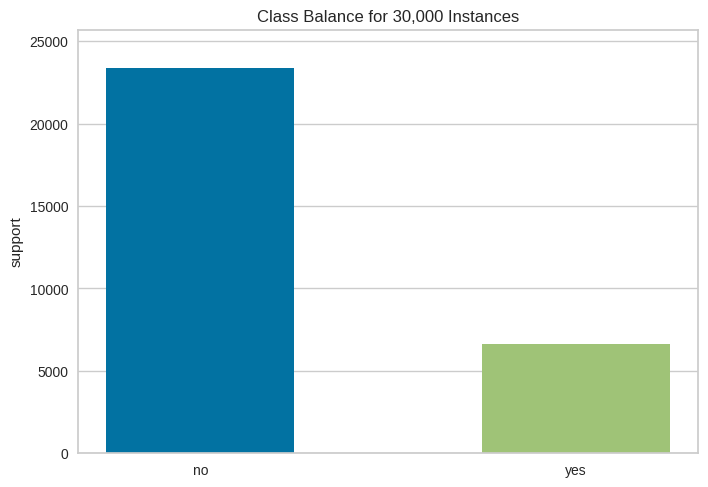

28.40267077555213 %


In [ ]:
# Visualizing labels distribution
visualizer = ClassBalance(labels = ["no", "yes"])
visualizer.fit(df["default.payment.next.month"])
visualizer.show()

# Percentage of 1-yes labels
print((((df["default.payment.next.month"]==1).sum()/((df["default.payment.next.month"]==0).sum())))*100,"%")

For the dependent variables, there are far more not default payments, which will be additional challenge for ML optimization. This is very unbalanced dataset.

EDUCATION


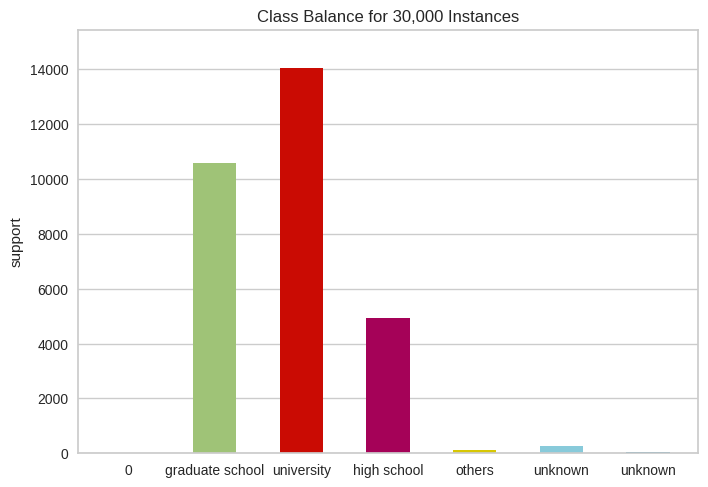

MARRIAGE


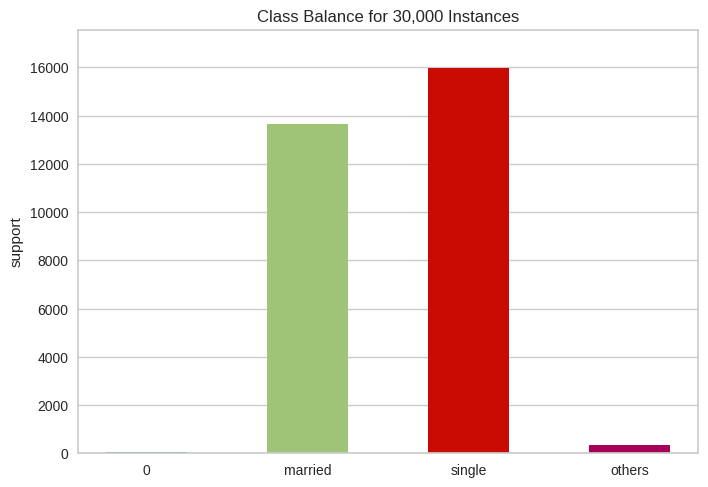

<Axes: title={'center': 'Class Balance for 30,000 Instances'}, ylabel='support'>

In [ ]:
# Visualizing education and marriage
print("EDUCATION")
visualizer = ClassBalance(labels=["0", "graduate school", "university", "high school", "others", "unknown", "unknown"])
visualizer.fit(df["EDUCATION"])
visualizer.show()

print("MARRIAGE")
visualizer = ClassBalance(labels = ["0", "married", "single", "others"])
visualizer.fit(df["MARRIAGE"])
visualizer.show()

There are cases of 0 as education/marriage value, which is incorrect with the features description. There are also two unknown groups and one others in marriage. These categorical features needs correction.

In [ ]:
# Dropping duplicates
df_prep = df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)

In [ ]:
# Mapping
# Marriage - changing 0 to others
# Education changing 0, 5=unknown, 6=unknown, 4=others

def mapping(df):
  dict_map_edu = {
      0:4,1:1,2:2,3:3,4:4,5:4,6:4
  }
  dict_map_mar = {
      0:3,1:1,2:2,3:3
  }
  df["EDUCATION"] = df["EDUCATION"].map(dict_map_edu)
  df["MARRIAGE"] = df["MARRIAGE"].map(dict_map_mar)
  return df
df_prep = mapping(df)

* Dataset has 30000 samples and 24 features, all numerical
* 35 duplicates
* Columns SEX, MARRIAGE, EDUCATION contains categorical values
* There are no null, but there are some 0 values which aren't provided in data information, they were checked and reassigned
* **Default payment next month** is the dependent variable while the rest is independend variable
* For the dependent variables, there are far more not default payments, which will be additional challenge for ML optimization

## ***2. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###Gender chart

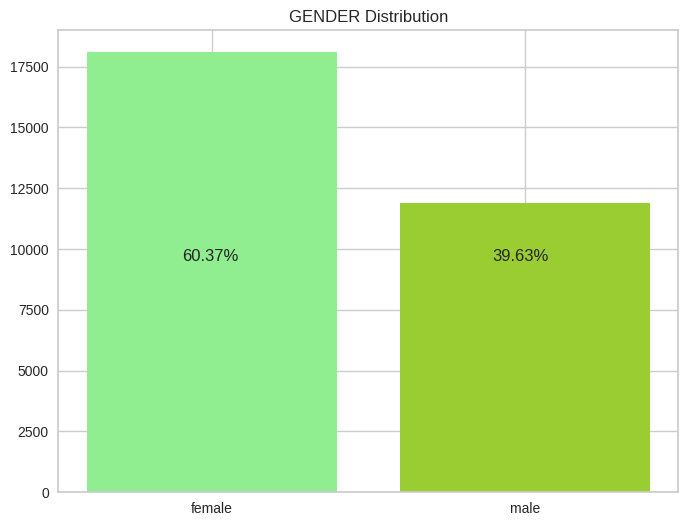

In [ ]:
# SEX: Gender (1=male, 2=female)

# Calculating percentage of male and female
classes=df_prep['SEX'].value_counts()
male=classes[1]/df_prep['SEX'].count()*100
female=classes[2]/df_prep['SEX'].count()*100

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(['female','male'], classes, color=['lightgreen','yellowgreen'])
plt.title("GENDER Distribution")
plt.annotate("{0:.4}%".format(female),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(male),(0.7, 0.5), xycoords='axes fraction')
plt.show()

Gender isn't balanced, there are more female representatives in dataset.

###Customer default analysis as per Gender

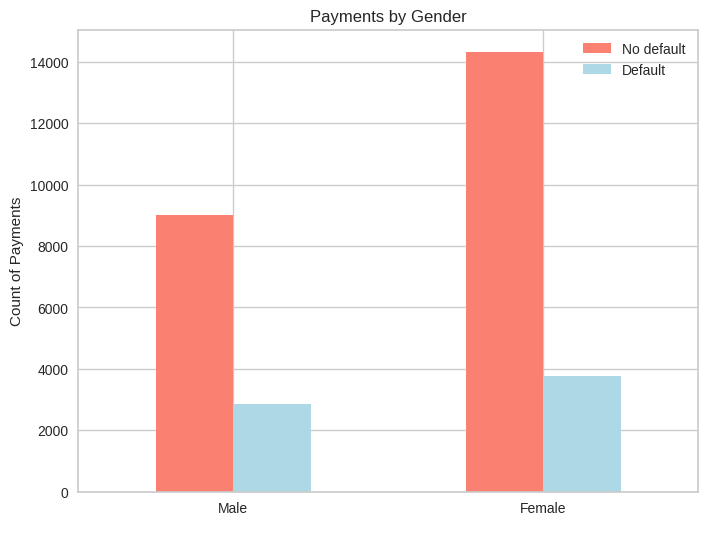

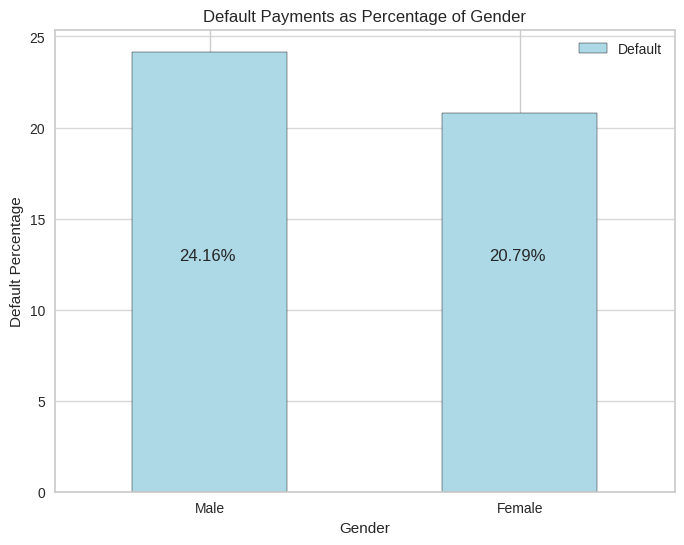

In [ ]:
# Simple Customer default analysis as per Gender
pd.crosstab(df_prep["SEX"], df_prep["default.payment.next.month"]).plot(kind="bar",figsize=(8,6),color=['salmon','lightblue'])
plt.title('Payments by Gender')
plt.xlabel(' ')
plt.ylabel('Count of Payments')
plt.legend(['No default','Default'])
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.show()

gender_counts = df_prep.groupby('SEX')['default.payment.next.month'].count()  # Total counts by gender
default_counts = df_prep.groupby('SEX')['default.payment.next.month'].sum()  # Default counts by gender
# Calculate percentages
default_percentages = (default_counts / gender_counts) * 100

# Creating the percentage bar chart
plt.figure(figsize=(8, 6))
default_percentages.plot(kind='bar', color=['lightblue'], edgecolor='black')
plt.title('Default Payments as Percentage of Gender')
plt.xlabel('Gender')
plt.ylabel('Default Percentage')
plt.annotate("{0:.4}%".format(default_percentages[1]),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(default_percentages[2]),(0.7, 0.5), xycoords='axes fraction')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.legend(['Default'])
plt.show()

Absolute value of female defaulter is more than male defaulter.

Although there is more female defaulters, there are slightly more male defaulters in sex percentage distribution.

###Marital status chart

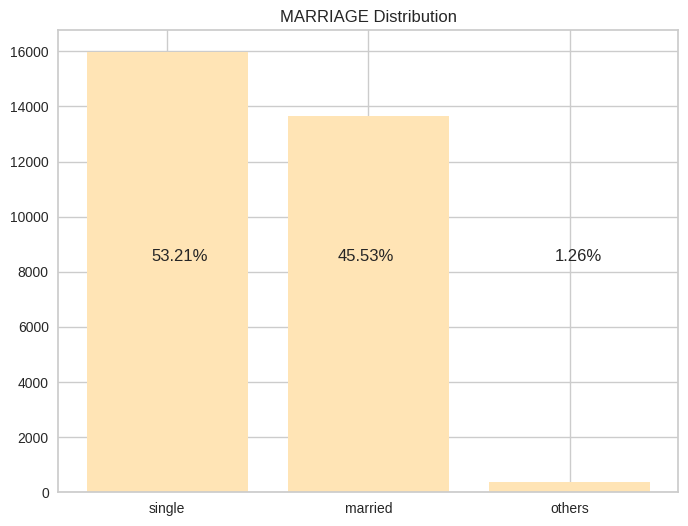

In [ ]:
# Marital status percentage count
classes=df_prep['MARRIAGE'].value_counts()
married=classes[1]/df_prep['MARRIAGE'].count()*100
single=classes[2]/df_prep['MARRIAGE'].count()*100
others=classes[3]/df_prep['MARRIAGE'].count()*100

# Plotting marital status
plt.figure(figsize=(8, 6))
plt.bar(['single', 'married','others'], classes, color='moccasin')
plt.title("MARRIAGE Distribution")
plt.annotate("{0:.4}%".format(single),(0.15, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(married),(0.45, 0.5), xycoords='axes fraction')
plt.annotate("{0:.3}%".format(others),(0.8, 0.5), xycoords='axes fraction')
plt.show()

###Customer default analysis as per marital status

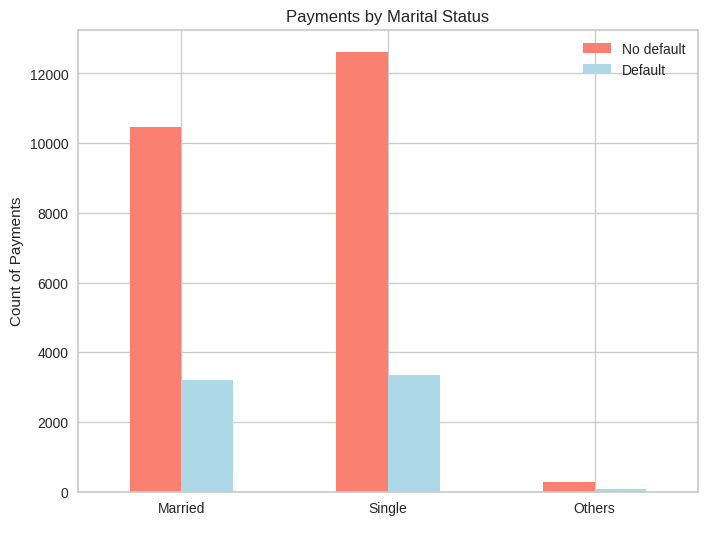

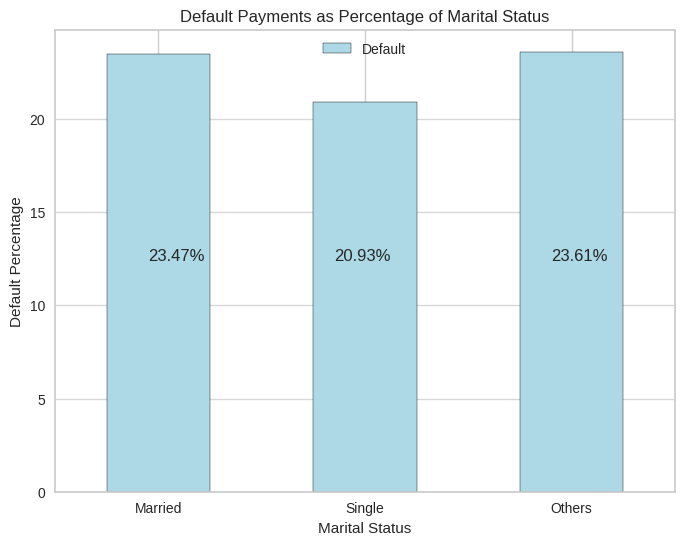

In [ ]:
# Simple visualization of marital status and default payment
pd.crosstab(df_prep["MARRIAGE"], df_prep["default.payment.next.month"]).plot(kind="bar",figsize=(8,6),color=['salmon','lightblue'])
plt.title('Payments by Marital Status')
plt.xlabel(' ')
plt.ylabel('Count of Payments')
plt.legend(['No default','Default'])
plt.xticks(ticks=[0, 1, 2], labels=['Married', 'Single', "Others"], rotation=0)
plt.show()

# Marital status vs default percentage count
marital_counts = df_prep.groupby('MARRIAGE')['default.payment.next.month'].count()  # Total counts by gender
default_counts = df_prep.groupby('MARRIAGE')['default.payment.next.month'].sum()  # Default counts by gender
default_percentages = (default_counts / marital_counts) * 100

# Default Payments as Percentage of Marital Status
plt.figure(figsize=(8, 6))
default_percentages.plot(kind='bar', color=['lightblue'], edgecolor='black')
plt.title('Default Payments as Percentage of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Default Percentage')
plt.annotate("{0:.4}%".format(default_percentages[1]),(0.15, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(default_percentages[2]),(0.45, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(default_percentages[3]),(0.8, 0.5), xycoords='axes fraction')
plt.xticks(ticks=[0, 1, 2], labels=['Married', 'Single', "Others"], rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.legend(['Default'])
plt.show()

There isn't a significant correlation between default payments and marital status.

###Education

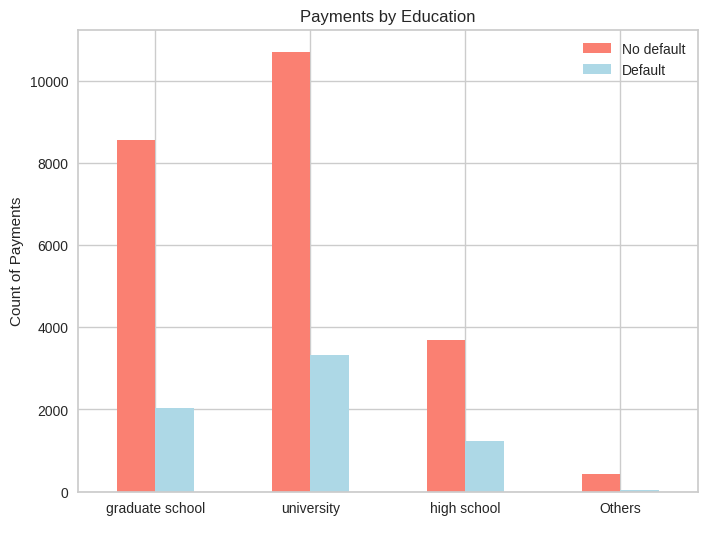

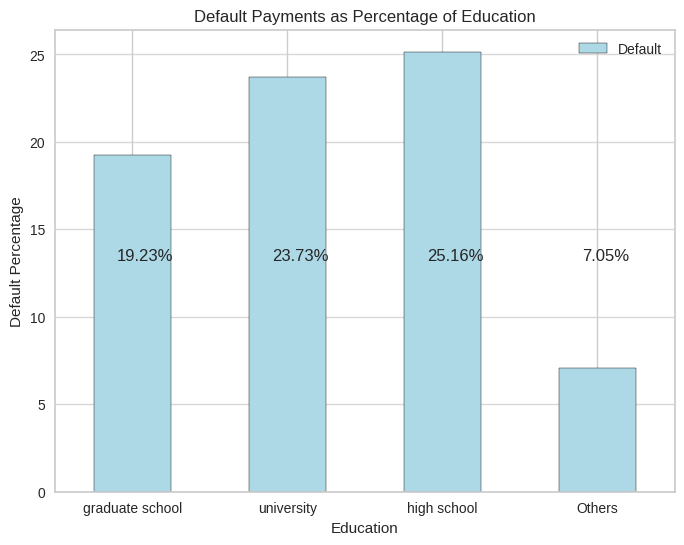

In [ ]:
# Simple visualization of education and default payment
pd.crosstab(df_prep["EDUCATION"], df_prep["default.payment.next.month"]).plot(kind="bar",figsize=(8,6),color=['salmon','lightblue'])
plt.title('Payments by Education')
plt.xlabel(' ')
plt.ylabel('Count of Payments')
plt.legend(['No default','Default'])
plt.xticks(ticks=[0, 1, 2, 3], labels=['graduate school', 'university', "high school", "Others"], rotation=0)
plt.show()

# Education vs default percentage count
education_counts = df_prep.groupby('EDUCATION')['default.payment.next.month'].count()  # Total counts by gender
default_counts = df_prep.groupby('EDUCATION')['default.payment.next.month'].sum()  # Default counts by gender
default_percentages = (default_counts / education_counts) * 100

# Default Payments as Percentage of Education
plt.figure(figsize=(8, 6))
default_percentages.plot(kind='bar', color=['lightblue'], edgecolor='black')
plt.title('Default Payments as Percentage of Education')
plt.xlabel('Education')
plt.ylabel('Default Percentage')
plt.annotate("{0:.4}%".format(default_percentages[1]),(0.1, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(default_percentages[2]),(0.35, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(default_percentages[3]),(0.6, 0.5), xycoords='axes fraction')
plt.annotate("{0:.3}%".format(default_percentages[4]),(0.85, 0.5), xycoords='axes fraction')
plt.xticks(ticks=[0, 1, 2, 3], labels=['graduate school', 'university', "high school", "Others"], rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.legend(['Default'])
plt.show()


Absolute numbers of defaulters is maximum among university graduates.

The highest probability of default payment is among high school students.

###Balance Limit correlation

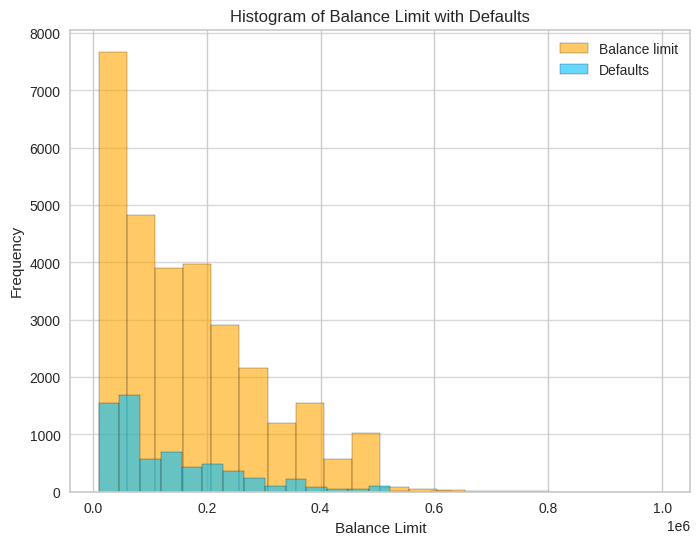

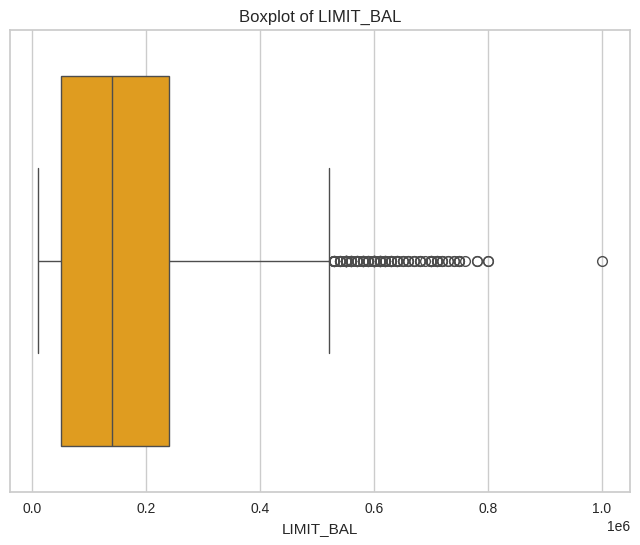

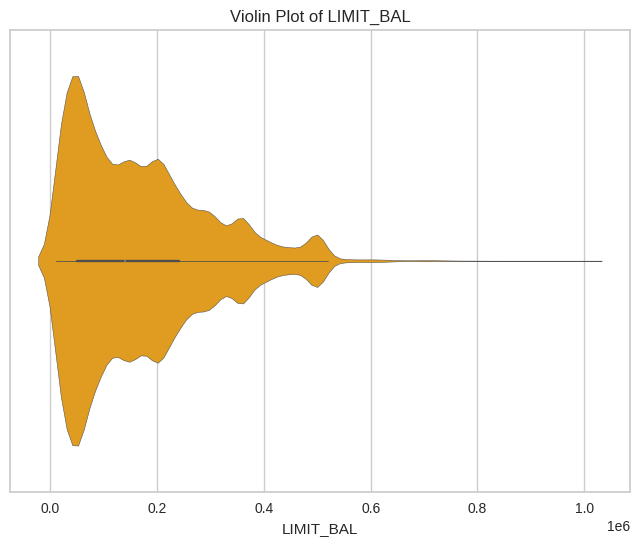

In [ ]:
# Histogram to visualize the distribution of 'LIMIT_BAL'

# Plot histogram for all Balance Limit
plt.figure(figsize=(8, 6))
plt.hist(df['LIMIT_BAL'], bins=20, color='orange', edgecolor='black', alpha=0.6, label='Balance limit')

# Plot histogram for defaults only
plt.hist(df[df['default.payment.next.month'] == 1]['LIMIT_BAL'], bins=20, color='deepskyblue', edgecolor='black', alpha=0.6, label='Defaults')

# Add titles and labels
plt.title('Histogram of Balance Limit with Defaults')
plt.xlabel('Balance Limit')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.legend()  # Add legend
plt.show()

# Boxplot to detect outliers and see spread
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['LIMIT_BAL'], color='orange')
plt.title('Boxplot of LIMIT_BAL')
plt.xlabel('LIMIT_BAL')
plt.show()

# Violin plot for detailed distribution and density
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['LIMIT_BAL'], color='orange')
plt.title('Violin Plot of LIMIT_BAL')
plt.xlabel('LIMIT_BAL')
plt.show()

Histogram is right skewed. Visible cluster of more common credit limits on the lower side. From Boxplot we see IQR (50% of all data) ~50-250k. Peaks in the violin plot indicate that values are concentrated ~50k.

Frequency of default payments decreases with lincreasing balance limit.

<ipython-input-60-136d54d47aaf>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df_prep.groupby('LIMIT_BAL_bins')['default.payment.next.month'].mean() * 100  # Convert to percentage


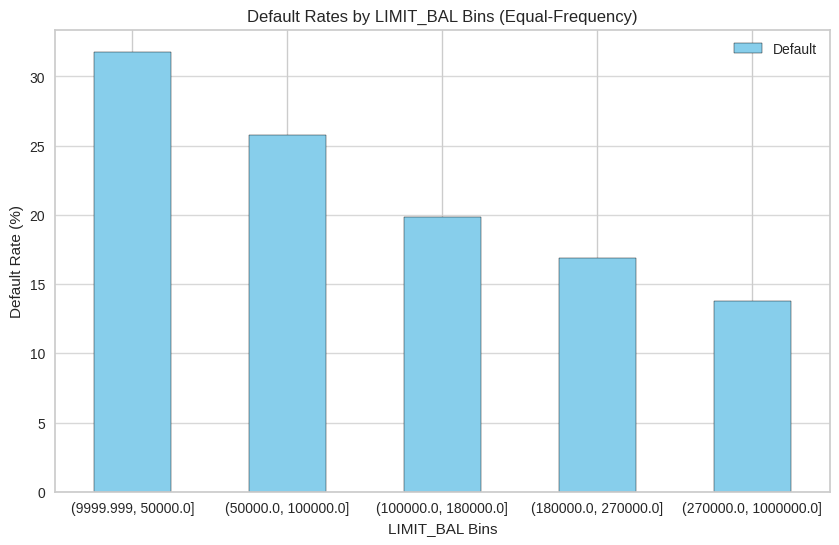


Number of entries in each LIMIT_BAL bin:
LIMIT_BAL_bins
(9999.999, 50000.0]      7676
(100000.0, 180000.0]     6123
(270000.0, 1000000.0]    5958
(180000.0, 270000.0]     5421
(50000.0, 100000.0]      4822
Name: count, dtype: int64


In [ ]:
# Create equal-frequency bins for LIMIT_BAL for ML
df_prep['LIMIT_BAL_bins'] = pd.qcut(df_prep['LIMIT_BAL'], q=5)

# Calculate default rates for each bin
default_rates = df_prep.groupby('LIMIT_BAL_bins')['default.payment.next.month'].mean() * 100  # Convert to percentage

# Count total entries in each bin (optional for understanding bin sizes)
bin_counts = df_prep['LIMIT_BAL_bins'].value_counts()

# Plot default rates by LIMIT_BAL bins
plt.figure(figsize=(10, 6))
default_rates.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Default Rates by LIMIT_BAL Bins (Equal-Frequency)')
plt.xlabel('LIMIT_BAL Bins')
plt.ylabel('Default Rate (%)')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=0)
plt.legend(['Default'])
plt.show()

# Print bin counts for review
print("\nNumber of entries in each LIMIT_BAL bin:")
print(bin_counts)

# Converting bins to categorical ((OHE)/SMOTE can work on interval features created after binning, but it requires some preprocessing).
df_prep['LIMIT_BAL_bins'] = df_prep['LIMIT_BAL_bins'].astype('category').cat.codes # If converted to string earlier then category, then int8

The default rate is highest in Bin 1 (the lowest credit limit group) and gradually decreases as credit limits increase. This suggests a negative correlation between credit limit (LIMIT_BAL) and default **likelihood**.




###Age

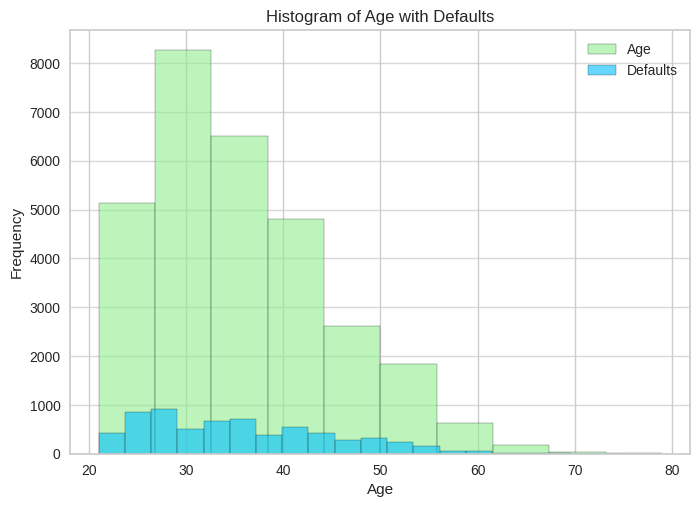

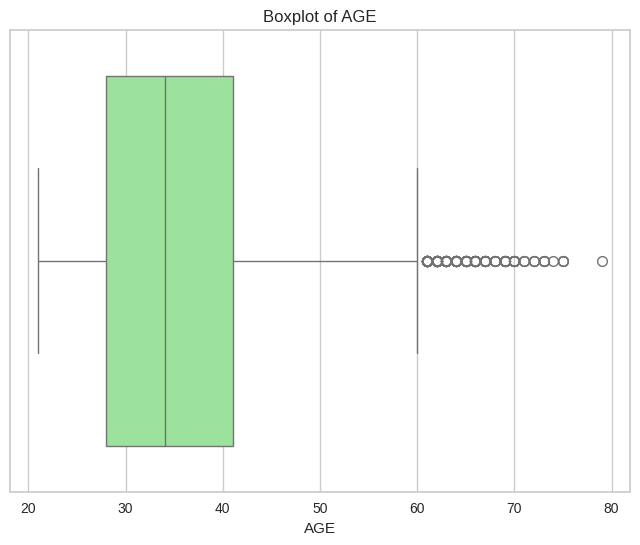

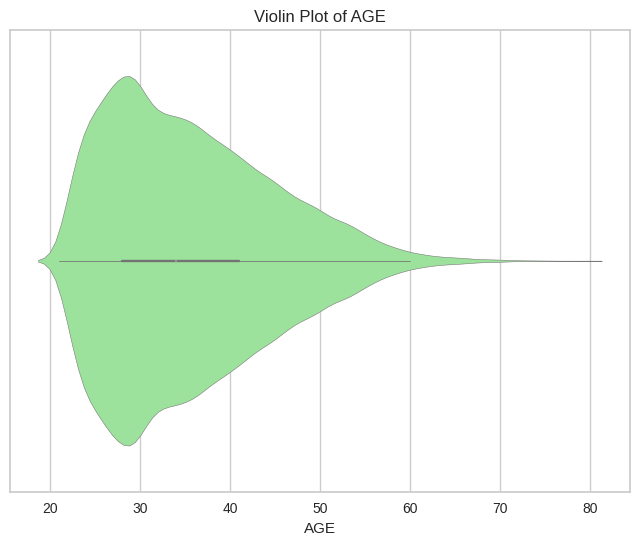

In [ ]:
# Histogram to visualize the distribution of 'AGE'
# Plot histogram for all AGE
plt.hist(df['AGE'], bins=10, color='lightgreen', edgecolor='black', alpha=0.6, label='Age')

# Plot histogram for defaults only
plt.hist(df[df['default.payment.next.month'] == 1]['AGE'], bins=20, color='deepskyblue', edgecolor='black', alpha=0.6, label='Defaults')

# Add titles and labels
plt.title('Histogram of Age with Defaults')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.legend()  # Add legend
plt.show()

# Boxplot to detect outliers and see spread
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['AGE'], color='lightgreen')
plt.title('Boxplot of AGE')
plt.xlabel('AGE')
plt.show()

# Violin plot for detailed distribution and density
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['AGE'], color='lightgreen')
plt.title('Violin Plot of AGE')
plt.xlabel('AGE')
plt.show()

The most clients are between 25-30 years. Maximum number of defaulting customers are between 25-30. Visible cluster of more common age  on the lower side. From Boxplot we see IQR (50% of all data) ~27-41 years.

<ipython-input-61-e3417e315b4a>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df_prep.groupby('AGE_bins')['default.payment.next.month'].mean() * 100  # Convert to percentage


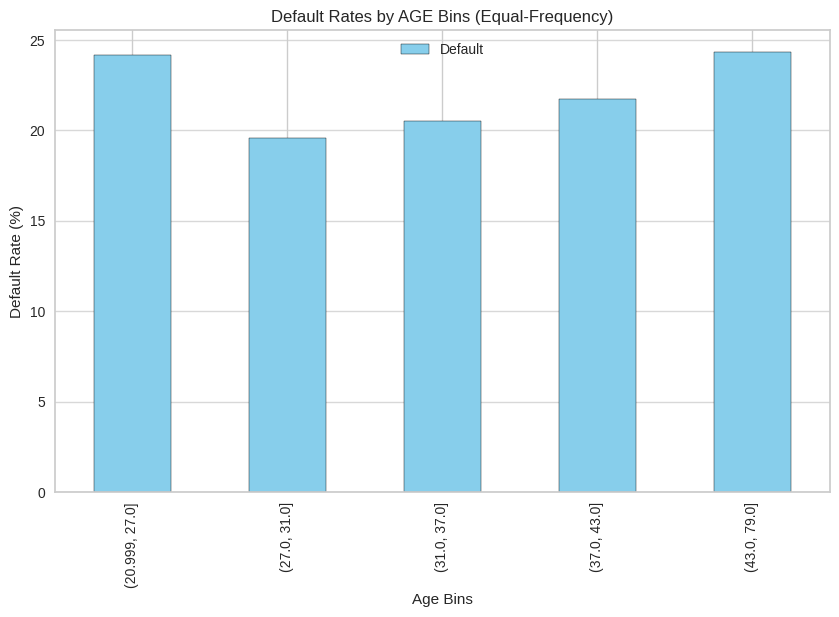


Number of entries in each LIMIT_BAL bin:
AGE_bins
(31.0, 37.0]      6728
(20.999, 27.0]    6604
(43.0, 79.0]      5986
(27.0, 31.0]      5626
(37.0, 43.0]      5056
Name: count, dtype: int64


In [ ]:
# Create equal-frequency bins for LIMIT_BAL for ML
df_prep['AGE_bins'] = pd.qcut(df_prep['AGE'], q=5)

# Calculate default rates for each bin
default_rates = df_prep.groupby('AGE_bins')['default.payment.next.month'].mean() * 100  # Convert to percentage

# Count total entries in each bin (optional for understanding bin sizes)
bin_counts = df_prep['AGE_bins'].value_counts()

# Plot default rates by LIMIT_BAL bins
plt.figure(figsize=(10, 6))
default_rates.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Default Rates by AGE Bins (Equal-Frequency)')
plt.xlabel('Age Bins')
plt.ylabel('Default Rate (%)')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=90)
plt.legend(['Default'])
plt.show()

# Print bin counts for review
print("\nNumber of entries in each LIMIT_BAL bin:")
print(bin_counts)

# Converting bins to categorical ((OHE)/SMOTE can work on interval features created after binning, but it requires some preprocessing).
df_prep['AGE_bins'] = df_prep['AGE_bins'].astype('category').cat.codes # If converted to string earlier then category, then int8

Default payment likelihood is the highest for 21-25. After age 40 likelihood have a constant possitive correlation.


* Columns SEX, MARRIAGE, EDUCATION contains categorical values
* It's unbalnced by genter (more female), education (more university)
* It's rather balanced when it comes to marital status (maried/single)
* LIMIT_BAL: Histogram is right skewed. Visible cluster of more common credit limits on the lower side. From Boxplot we see IQR (50% of all data) ~50-250k. Peaks in the violin plot indicate that values are concentrated ~50k.
* AGE: The most clients are between 25-30 years.Visible cluster of more common age on the lower side. From Boxplot we see IQR (50% of all data) ~27-41 years

###Heatmap

<Axes: >

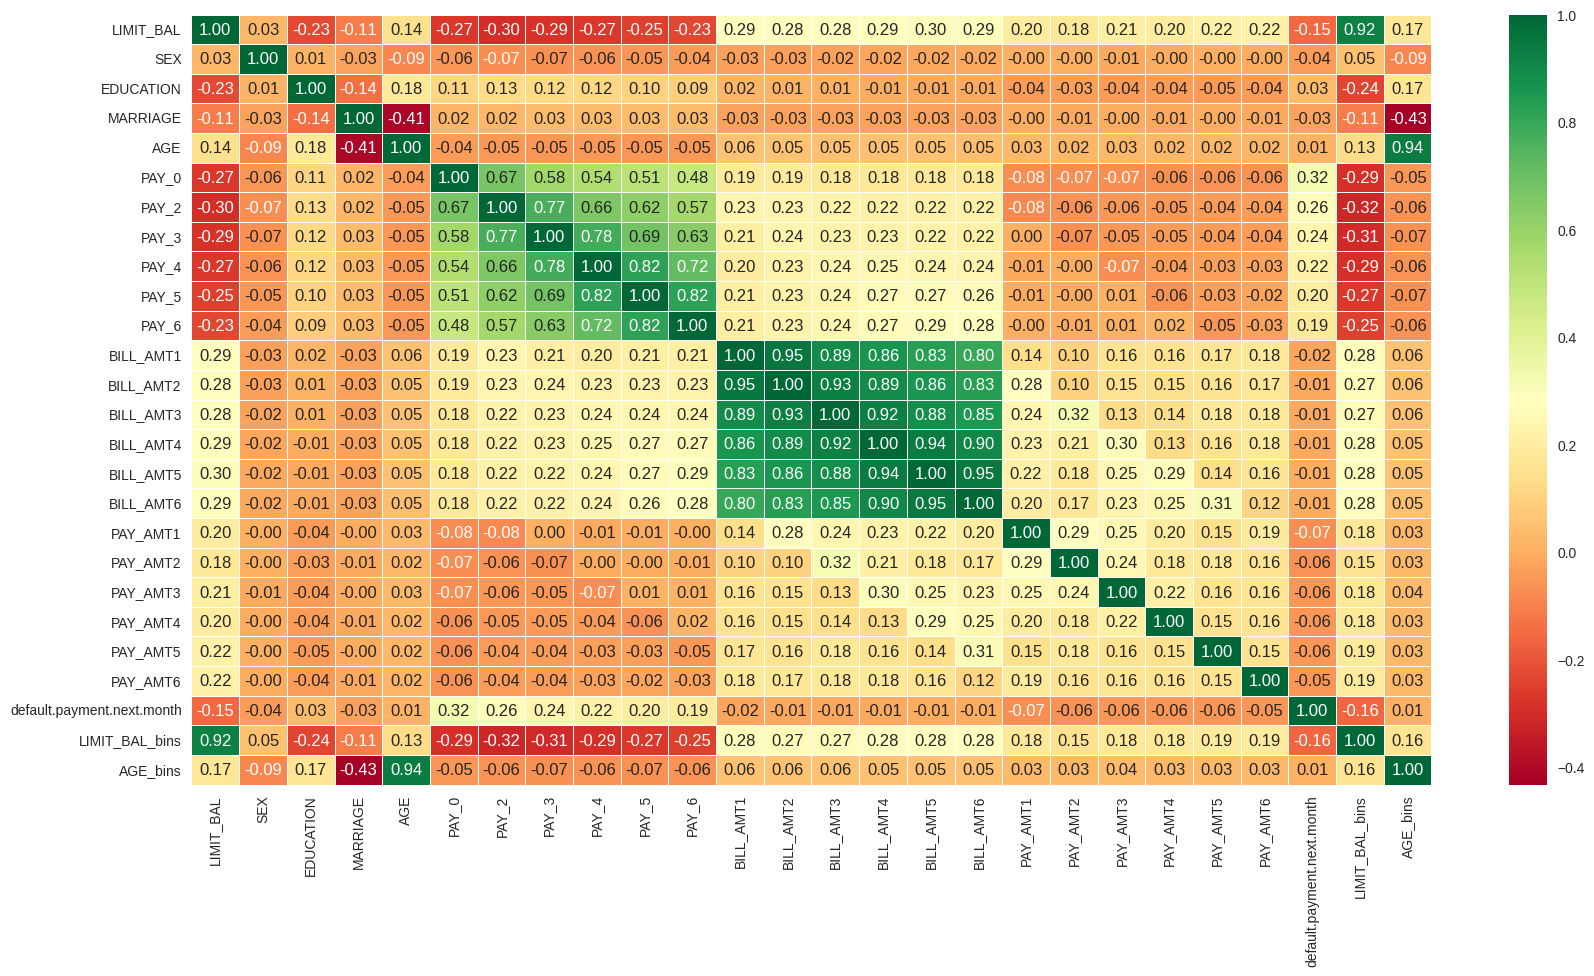

In [ ]:
# First Correlation Heatmap visualization code (mapped data & created binns for age and limit_bal)
corrmat = df_prep.corr(numeric_only=True)
plt.figure(figsize=(20,10))
sns.heatmap(df_prep[corrmat.index].corr(),annot=True,linewidths=0.5,fmt='.2f',cmap="RdYlGn")

 Key Variables Related to Default Payment (default.payment.next.month)


**Top correlated variables:**

PAY_x:
* These represent the repayment status in previous months.
* Positive correlation: Higher delinquency levels in repayment history increase the likelihood of default.
* The highest correlation has the most recent month

LIMIT_BAL (correlation ≈ -0.15):
* Negative correlation suggests customers with higher credit limits are less likely to default, accurate with earlier findings.



**Strong Relationships Among Predictors:**

PAY_x, BILL_ATM_x:

* These represent statuses across months and are strongly correlated since they track similar behaviors over time.
* This means they carry redundant information, leading to multicollinearity.
* Multicollinearity can negatively impact models like logistic regression by inflating coefficients and reducing interpretability.
* Summarization or dimensionality reduction (e.g., PCA) might help.


**Further possibilities**
>Dimensionality reduction helps summarize highly correlated variables (e.g., PAY_x, BILL_AMTx, and potentially PAY_AMTx) into fewer, independent components.

>SMOTE addressing imbalanced datasets by oversampling the minority class.

## ***3. Feature Importances & Dimensionality reduction***

###Feature Importances

In [ ]:
# Splitting the dataset with preserving initial data imbalance
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df_prep, df_prep["default.payment.next.month"]):
    strat_train_set = df_prep.loc[train_index]
    strat_test_set = df_prep.loc[test_index]

X_train = strat_train_set.drop(columns=["default.payment.next.month"]).values
y_train = strat_train_set["default.payment.next.month"].values

X_test = strat_test_set.drop(columns=["default.payment.next.month"]).values
y_test = strat_test_set["default.payment.next.month"].values

In [ ]:
# Simple Random Forest for feature importances
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4667
           1       0.65      0.33      0.44      1326

    accuracy                           0.81      5993
   macro avg       0.74      0.64      0.66      5993
weighted avg       0.79      0.81      0.79      5993



[('PAY_0', 0.09186166652139953), ('BILL_AMT1', 0.06216906214908761), ('AGE', 0.05420746731639556), ('PAY_AMT1', 0.052149951590740595), ('BILL_AMT2', 0.05211684370892258), ('LIMIT_BAL', 0.05094888998729399), ('PAY_AMT2', 0.05089600134068194), ('BILL_AMT3', 0.04890656232591198), ('BILL_AMT4', 0.047747549055999), ('BILL_AMT5', 0.04754880542983666), ('PAY_AMT3', 0.04736672732419991), ('BILL_AMT6', 0.04736479893984482), ('PAY_2', 0.047030922253807485), ('PAY_AMT6', 0.045265624875081), ('PAY_AMT4', 0.04294923160127447), ('PAY_AMT5', 0.042618112859659094), ('PAY_3', 0.027644940498375493), ('PAY_4', 0.022668711191212748), ('PAY_5', 0.01995681410871744), ('LIMIT_BAL_bins', 0.019371405791801372), ('AGE_bins', 0.019352440788814217), ('EDUCATION', 0.018985756454989587), ('PAY_6', 0.018556692328136143), ('MARRIAGE', 0.011861602385471657), ('SEX', 0.010453419172345078)]


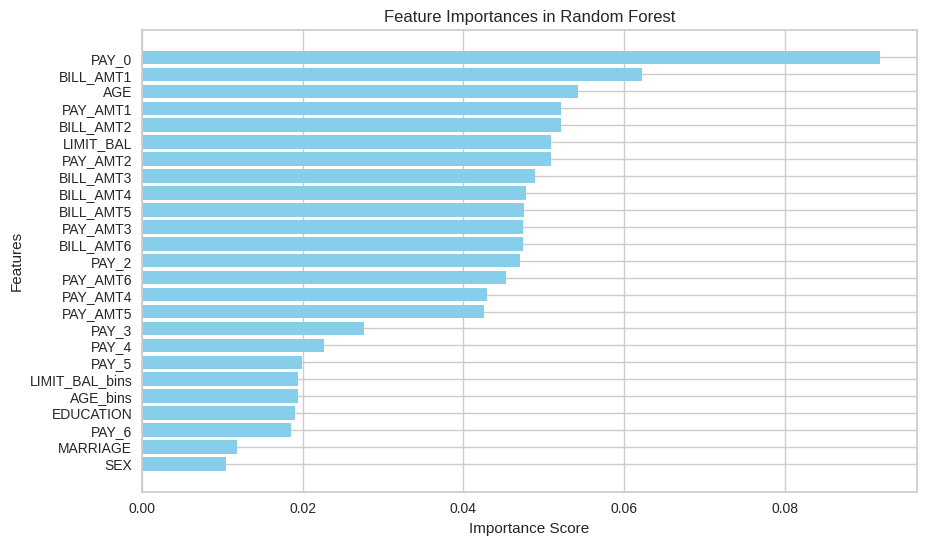

In [ ]:
# Reviewing feture importances for basic dataset
importance = rf.feature_importances_
feature_names = strat_train_set.drop(columns=["default.payment.next.month"]).columns
feature_importance_dict = dict(zip(feature_names, importance))
sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_importances)

# Visualizing feature importances
plt.figure(figsize=(10, 6))
plt.barh(
    [x[0] for x in sorted_importances],
    [x[1] for x in sorted_importances],
    color='skyblue'
)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances in Random Forest")
plt.gca().invert_yaxis()  # Flip the y-axis to show the most important features at the top
plt.show()

We can delete features with lower feature importances than 2%, since we have a lot of features. We see their low importance with random forest analysis and no correlation between those categorical data (SEX, MARRIAGE, EDUCATION) and default payment on heatmap and during EDA with charts. Unfortunately, grouping LIMIT_BAL and AGE wasn't helpful and performed worse than raw features and also will be deleted. PAY_5 and PAY_6 shows the worst correlation thought whole PAY_x features so we can also exclude them without missing important data.

###Dimensionality reduction

In [ ]:
columns_to_remove= []
for i in sorted_importances:
  if i[1] < 0.02:
    columns_to_remove.append(i[0])

In [ ]:
df_prep = df_prep.drop(columns=columns_to_remove)

###Dataset Save

In [ ]:
# Dataset for further analysis
df_prep.to_csv("df_prep.csv", index=False)

##***4. Data load/split***

### Dataset Load

In [6]:
def load_data(file_path):
    """Load the dataset from a specified file path."""
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

###Splitting

In [7]:
def stratify_splitting(df):
  split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
  try:
    for train_index, test_index in split.split(df, df["default.payment.next.month"]):
      strat_train_set = df.loc[train_index]
      strat_test_set = df.loc[test_index]
    feature_names = strat_train_set.drop(columns=["default.payment.next.month"]).columns
    return strat_train_set, strat_test_set, feature_names
  except Exception as e:
    print(f"Error while splitting: {e}")
    return None

def xy_splitting_scaling(strat_train_set, strat_test_set):
  try:
    X_train = strat_train_set.drop(columns=["default.payment.next.month"])
    y_train = strat_train_set["default.payment.next.month"].values # Convert to NumPy array
    X_test = strat_test_set.drop(columns=["default.payment.next.month"])
    y_test = strat_test_set["default.payment.next.month"].values
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, y_train, X_test, y_test
  except Exception as e:
    print(f"Error while xy_splitting: {e}")

In [8]:
file_path = 'https://raw.githubusercontent.com/Zanyata/Default-of-Credit-Card/refs/heads/main/data/df_prep.csv'
df_prep = load_data(file_path)
strat_train_set, strat_test_set, feature_names = stratify_splitting(df_prep)
X_train, y_train, X_test, y_test = xy_splitting_scaling(strat_train_set, strat_test_set)

#***5. AutoML***

AutoML allows testing multiple machine learning models on a dataset, automatically comparing their performance. It selects the best-performing model by evaluating metrics like accuracy, precision, or other criteria specified by the user.

In [14]:
!pip install flaml
from flaml import AutoML
!pip install catboost
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.2/314.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00


In [ ]:
"""F1-Score AutoML"""

# Eestimator list
estimator_list = ['xgboost', 'rf', 'lgbm', 'lrl1', 'lrl2', 'catboost', 'svc']

# AutoML settings
automl_settings = {
    "time_budget": 300,  # Run for x sec
    "metric": "f1",  # Optimize for F1-Score
    "task": "classification",  # Classification task
    "estimator_list": estimator_list,  # Custom estimator list
    "log_file_name": "flaml_log.txt",  # Log file for tracking progress
    "n_jobs": -1,  # Use all available CPU cores
    "verbose": 3,  # Detailed logs
    "eval_method": "cv",  # Use cross-validation for robust evaluation
    "log_training_metric": True,  # Log training metrics
}

# Initialize AutoML
automl = AutoML()

# Fit AutoML
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

# Use the best model for predictions
y_pred = automl.predict(X_test)
y_pred_proba = automl.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluate the results
print("\n=== Model Evaluation ===")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix for Analysis
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Get the best model
print("\n=== Best Model ===")
print(f"Best Estimator: {automl.best_estimator}")  # Example: 'lgbm' (LightGBM)
print("Best Hyperparameters:")
print(automl.best_config)

# Get the best score
print("\nBest F1-Score (on validation set):")
print(1 - automl.best_loss)

[flaml.automl.logger: 01-06 20:53:48] {1728} INFO - task = classification
[flaml.automl.logger: 01-06 20:53:48] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 01-06 20:53:49] {1838} INFO - Minimizing error metric: 1-f1
[flaml.automl.logger: 01-06 20:53:49] {1955} INFO - List of ML learners in AutoML Run: ['xgboost', 'rf', 'lgbm', 'lrl1', 'lrl2', 'catboost', 'svc']
[flaml.automl.logger: 01-06 20:53:49] {2258} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 01-06 20:53:49] {2393} INFO - Estimated sufficient time budget=4641s. Estimated necessary time budget=60s.
[flaml.automl.logger: 01-06 20:53:49] {2442} INFO -  at 0.5s,	estimator xgboost's best error=1.0000,	best estimator xgboost's best error=1.0000
[flaml.automl.logger: 01-06 20:53:49] {2258} INFO - iteration 1, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:53:50] {2442} INFO -  at 1.5s,	estimator lgbm's best error=1.0000,	best estimator xgboost's best error=1.0000
[flaml.automl.logger: 01-06 20:53:50] {2258} INFO - iteration 2, current learner svc


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:flaml.tune.searcher.

[flaml.automl.logger: 01-06 20:53:51] {2442} INFO -  at 2.0s,	estimator svc's best error=0.7330,	best estimator svc's best error=0.7330
[flaml.automl.logger: 01-06 20:53:51] {2258} INFO - iteration 3, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:53:51] {2442} INFO -  at 2.5s,	estimator lgbm's best error=1.0000,	best estimator svc's best error=0.7330
[flaml.automl.logger: 01-06 20:53:51] {2258} INFO - iteration 4, current learner svc


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:53:53] {2442} INFO -  at 4.2s,	estimator svc's best error=0.7327,	best estimator svc's best error=0.7327
[flaml.automl.logger: 01-06 20:53:53] {2258} INFO - iteration 5, current learner xgboost
[flaml.automl.logger: 01-06 20:53:53] {2442} INFO -  at 4.6s,	estimator xgboost's best error=1.0000,	best estimator svc's best error=0.7327
[flaml.automl.logger: 01-06 20:53:53] {2258} INFO - iteration 6, current learner xgboost
[flaml.automl.logger: 01-06 20:53:53] {2442} INFO -  at 5.0s,	estimator xgboost's best error=0.5541,	best estimator xgboost's best error=0.5541
[flaml.automl.logger: 01-06 20:53:53] {2258} INFO - iteration 7, current learner rf
[flaml.automl.logger: 01-06 20:53:54] {2442} INFO -  at 5.6s,	estimator rf's best error=0.6470,	best estimator xgboost's best error=0.5541
[flaml.automl.logger: 01-06 20:53:54] {2258} INFO - iteration 8, current learner xgboost
[flaml.automl.logger: 01-06 20:53:54] {2442} INFO -  at 6.0s,	estimator xgboost's best err

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:53:59] {2442} INFO -  at 10.9s,	estimator lgbm's best error=0.5593,	best estimator xgboost's best error=0.5120
[flaml.automl.logger: 01-06 20:53:59] {2258} INFO - iteration 16, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:00] {2442} INFO -  at 11.4s,	estimator xgboost's best error=0.5120,	best estimator xgboost's best error=0.5120
[flaml.automl.logger: 01-06 20:54:00] {2258} INFO - iteration 17, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:00] {2442} INFO -  at 11.9s,	estimator lgbm's best error=0.5290,	best estimator xgboost's best error=0.5120
[flaml.automl.logger: 01-06 20:54:00] {2258} INFO - iteration 18, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 20:54:01] {2442} INFO -  at 12.3s,	estimator xgboost's best error=0.5120,	best estimator xgboost's best error=0.5120
[flaml.automl.logger: 01-06 20:54:01] {2258} INFO - iteration 19, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:01] {2442} INFO -  at 12.7s,	estimator lgbm's best error=0.5290,	best estimator xgboost's best error=0.5120
[flaml.automl.logger: 01-06 20:54:01] {2258} INFO - iteration 20, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:02] {2442} INFO -  at 13.2s,	estimator lgbm's best error=0.5290,	best estimator xgboost's best error=0.5120
[flaml.automl.logger: 01-06 20:54:02] {2258} INFO - iteration 21, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:02] {2442} INFO -  at 13.8s,	estimator lgbm's best error=0.5244,	best estimator xgboost's best error=0.5120
[flaml.automl.logger: 01-06 20:54:02] {2258} INFO - iteration 22, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 20:54:03] {2442} INFO -  at 14.2s,	estimator xgboost's best error=0.5120,	best estimator xgboost's best error=0.5120
[flaml.automl.logger: 01-06 20:54:03] {2258} INFO - iteration 23, current learner xgboost
[flaml.automl.logger: 01-06 20:54:03] {2442} INFO -  at 14.6s,	estimator xgboost's best error=0.5120,	best estimator xgboost's best error=0.5120
[flaml.automl.logger: 01-06 20:54:03] {2258} INFO - iteration 24, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:04] {2442} INFO -  at 15.1s,	estimator lgbm's best error=0.5183,	best estimator xgboost's best error=0.5120
[flaml.automl.logger: 01-06 20:54:04] {2258} INFO - iteration 25, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:04] {2442} INFO -  at 15.7s,	estimator lgbm's best error=0.5183,	best estimator xgboost's best error=0.5120
[flaml.automl.logger: 01-06 20:54:04] {2258} INFO - iteration 26, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 20:54:05] {2442} INFO -  at 16.1s,	estimator xgboost's best error=0.5120,	best estimator xgboost's best error=0.5120
[flaml.automl.logger: 01-06 20:54:05] {2258} INFO - iteration 27, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:05] {2442} INFO -  at 16.5s,	estimator lgbm's best error=0.5183,	best estimator xgboost's best error=0.5120
[flaml.automl.logger: 01-06 20:54:05] {2258} INFO - iteration 28, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:06] {2442} INFO -  at 17.3s,	estimator lgbm's best error=0.5183,	best estimator xgboost's best error=0.5120
[flaml.automl.logger: 01-06 20:54:06] {2258} INFO - iteration 29, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:06] {2442} INFO -  at 17.8s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:06] {2258} INFO - iteration 30, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 20:54:07] {2442} INFO -  at 18.3s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:07] {2258} INFO - iteration 31, current learner xgboost
[flaml.automl.logger: 01-06 20:54:07] {2442} INFO -  at 18.7s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:07] {2258} INFO - iteration 32, current learner xgboost
[flaml.automl.logger: 01-06 20:54:08] {2442} INFO -  at 19.1s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:08] {2258} INFO - iteration 33, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:08] {2442} INFO -  at 19.6s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:08] {2258} INFO - iteration 34, current learner xgboost
[flaml.automl.logger: 01-06 20:54:08] {2442} INFO -  at 19.9s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:08] {2258} INFO - iteration 35, current learner rf
[flaml.automl.logger: 01-06 20:54:10] {2442} INFO -  at 21.1s,	estimator rf's best error=0.5476,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:10] {2258} INFO - iteration 36, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:11] {2442} INFO -  at 22.6s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:11] {2258} INFO - iteration 37, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:13] {2442} INFO -  at 24.1s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:13] {2258} INFO - iteration 38, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:13] {2442} INFO -  at 24.6s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:13] {2258} INFO - iteration 39, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 20:54:14] {2442} INFO -  at 25.1s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:14] {2258} INFO - iteration 40, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:14] {2442} INFO -  at 25.5s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:14] {2258} INFO - iteration 41, current learner catboost
[flaml.automl.logger: 01-06 20:54:19] {2442} INFO -  at 30.7s,	estimator catboost's best error=0.5240,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:19] {2258} INFO - iteration 42, current learner catboost
[flaml.automl.logger: 01-06 20:54:28] {2442} INFO -  at 39.9s,	estimator catboost's best error=0.5240,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:28] {2258} INFO - iteration 43, current learner xgboost
[flaml.automl.logger: 01-06 20:54:29] {2442} INFO -  at 40.3s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:29] {2258} INFO - iteration 44, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:29] {2442} INFO -  at 40.9s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:29] {2258} INFO - iteration 45, current learner catboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 20:54:33] {2442} INFO -  at 44.9s,	estimator catboost's best error=0.5240,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:33] {2258} INFO - iteration 46, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:34] {2442} INFO -  at 45.4s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:34] {2258} INFO - iteration 47, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 20:54:34] {2442} INFO -  at 45.9s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:34] {2258} INFO - iteration 48, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:35] {2442} INFO -  at 46.3s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:35] {2258} INFO - iteration 49, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:35] {2442} INFO -  at 46.7s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:35] {2258} INFO - iteration 50, current learner rf
[flaml.automl.logger: 01-06 20:54:39] {2442} INFO -  at 51.0s,	estimator rf's best error=0.5451,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:39] {2258} INFO - iteration 51, current learner catboost
[flaml.automl.logger: 01-06 20:54:54] {2442} INFO -  at 65.8s,	estimator catboost's best error=0.5240,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:54] {2258} INFO - iteration 52, current learner xgboost
[flaml.automl.logger: 01-06 20:54:55] {2442} INFO -  at 66.3s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:55] {2258} INFO - iteration 53, current learner xgboost
[flaml.automl.logger: 01-06 20:54:55] {2442} INFO -  at 66.7s,	estimator xgboost

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:57] {2442} INFO -  at 68.2s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:57] {2258} INFO - iteration 57, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 20:54:57] {2442} INFO -  at 68.6s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:57] {2258} INFO - iteration 58, current learner xgboost
[flaml.automl.logger: 01-06 20:54:57] {2442} INFO -  at 69.0s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:57] {2258} INFO - iteration 59, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:58] {2442} INFO -  at 69.5s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:58] {2258} INFO - iteration 60, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 20:54:59] {2442} INFO -  at 70.1s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:59] {2258} INFO - iteration 61, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:54:59] {2442} INFO -  at 70.6s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:54:59] {2258} INFO - iteration 62, current learner lrl2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 01-06 20:55:05] {2442} INFO -  at 76.8s,	estimator lrl2's best error=0.6482,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:55:05] {2258} INFO - iteration 63, current learner xgboost
[flaml.automl.logger: 01-06 20:55:08] {2442} INFO -  at 79.9s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:55:08] {2258} INFO - iteration 64, current learner lrl2
[flaml.automl.logger: 01-06 20:55:14] {2442} INFO -  at 86.0s,	estimator lrl2's best error=0.6482,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:55:14] {2258} INFO - iteration 65, current learner lrl2
[flaml.automl.logger: 01-06 20:55:21] {2442} INFO -  at 92.4s,	estimator lrl2's best error=0.6478,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:55:21] {2258} INFO - iteration 66, current learner xgboost
[flaml.automl.logger: 01-06 20:55:22] {2442} INFO -  at 93.7s,	estimator xgboost's best

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:55:25] {2442} INFO -  at 96.4s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:55:25] {2258} INFO - iteration 68, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:55:28] {2442} INFO -  at 99.3s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:55:28] {2258} INFO - iteration 69, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:55:33] {2442} INFO -  at 104.3s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:55:33] {2258} INFO - iteration 70, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 20:55:36] {2442} INFO -  at 107.1s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:55:36] {2258} INFO - iteration 71, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:55:37] {2442} INFO -  at 108.4s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:55:37] {2258} INFO - iteration 72, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:55:38] {2442} INFO -  at 109.7s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:55:38] {2258} INFO - iteration 73, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:55:39] {2442} INFO -  at 110.8s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:55:39] {2258} INFO - iteration 74, current learner catboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 20:55:44] {2442} INFO -  at 115.7s,	estimator catboost's best error=0.5240,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:55:44] {2258} INFO - iteration 75, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:55:45] {2442} INFO -  at 116.1s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:55:45] {2258} INFO - iteration 76, current learner catboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:56:40] {2442} INFO -  at 171.3s,	estimator catboost's best error=0.5240,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:56:40] {2258} INFO - iteration 77, current learner xgboost
[flaml.automl.logger: 01-06 20:56:40] {2442} INFO -  at 171.9s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:56:40] {2258} INFO - iteration 78, current learner xgboost
[flaml.automl.logger: 01-06 20:56:41] {2442} INFO -  at 172.3s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:56:41] {2258} INFO - iteration 79, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:56:42] {2442} INFO -  at 173.0s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:56:42] {2258} INFO - iteration 80, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 20:56:42] {2442} INFO -  at 173.4s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:56:42] {2258} INFO - iteration 81, current learner xgboost
[flaml.automl.logger: 01-06 20:56:42] {2442} INFO -  at 173.9s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:56:42] {2258} INFO - iteration 82, current learner catboost
[flaml.automl.logger: 01-06 20:57:41] {2442} INFO -  at 232.9s,	estimator catboost's best error=0.5240,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:57:41] {2258} INFO - iteration 83, current learner xgboost
[flaml.automl.logger: 01-06 20:57:42] {2442} INFO -  at 233.3s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:57:42] {2258} INFO - iteration 84, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:57:43] {2442} INFO -  at 234.1s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:57:43] {2258} INFO - iteration 85, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:57:44] {2442} INFO -  at 235.9s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:57:44] {2258} INFO - iteration 86, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:57:46] {2442} INFO -  at 238.0s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:57:46] {2258} INFO - iteration 87, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:57:47] {2442} INFO -  at 238.5s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:57:47] {2258} INFO - iteration 88, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:57:48] {2442} INFO -  at 239.3s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:57:48] {2258} INFO - iteration 89, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 20:57:48] {2442} INFO -  at 239.9s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:57:48] {2258} INFO - iteration 90, current learner xgboost
[flaml.automl.logger: 01-06 20:57:49] {2442} INFO -  at 240.3s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:57:49] {2258} INFO - iteration 91, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:57:49] {2442} INFO -  at 240.8s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:57:49] {2258} INFO - iteration 92, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 20:57:50] {2442} INFO -  at 241.2s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:57:50] {2258} INFO - iteration 93, current learner catboost
[flaml.automl.logger: 01-06 20:58:31] {2442} INFO -  at 283.0s,	estimator catboost's best error=0.5240,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:58:31] {2258} INFO - iteration 94, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:58:32] {2442} INFO -  at 283.6s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:58:32] {2258} INFO - iteration 95, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:58:33] {2442} INFO -  at 284.1s,	estimator lgbm's best error=0.5028,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:58:33] {2258} INFO - iteration 96, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:58:33] {2442} INFO -  at 284.5s,	estimator xgboost's best error=0.5120,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:58:33] {2258} INFO - iteration 97, current learner catboost
[flaml.automl.logger: 01-06 20:59:17] {2442} INFO -  at 329.0s,	estimator catboost's best error=0.5240,	best estimator lgbm's best error=0.5028
[flaml.automl.logger: 01-06 20:59:18] {2685} INFO - retrain lgbm for 0.1s
[flaml.automl.logger: 01-06 20:59:18] {2688} INFO - retrained model: LGBMClassifier(colsample_bytree=0.9364631270378546, learning_rate=1.0,
               max_bin=1023, min_child_samples=16, n_estimators=5, n_jobs=-1,
               num_leaves=6, reg_alpha=0.039200761358427656,
               reg_lambda=11.618528403273652, verbose=-1)
[flaml.automl.logger: 01-06 20:59:18] {1985} INFO - fit succeeded
[flaml.automl.logger: 01-06 20:59:18] {1986} INFO - Time taken to find the best model: 17.83373212814331

=== Model Evaluation ===
F1-Score: 0.49

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
"""ap score AutoML"""

# Estimator list
estimator_list3 = ['xgboost', 'rf', 'lgbm', 'lrl1', 'lrl2', 'catboost', 'svc']

# AutoML settings
automl_settings3 = {
    "time_budget": 300,  # Run for x sec
    "metric": "ap",  # Optimize for Average Precision to minimize False Negatives
    "task": "classification",  # Classification task
    "estimator_list": estimator_list3,  # Custom estimator list
    "log_file_name": "flaml_log3.txt",  # Log file for tracking progress
    "n_jobs": -1,  # Use all available CPU cores
    "verbose": 3,  # Detailed logs
    "eval_method": "cv",  # Use cross-validation for robust evaluation
    "log_training_metric": True,  # Log training metrics
}

# Initialize AutoML
automl3 = AutoML()

# Fit AutoML
automl3.fit(X_train=X_train, y_train=y_train, **automl_settings3)

# Use the best model for predictions
y_pred3 = automl3.predict(X_test)
y_pred_proba3 = automl3.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluate the results
print("\n=== Model Evaluation ===")
print(f"F1-Score: {f1_score(y_test, y_pred3):.4f}")
print(f"Precision: {precision_score(y_test, y_pred3):.4f}")
print(f"Recall (Minimizing False Negatives): {recall_score(y_test, y_pred3):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba3):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred3))

# Confusion Matrix for Analysis
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred3))

# Get the best model
print("\n=== Best Model ===")
print(f"Best Estimator: {automl3.best_estimator}")  # Example: 'lgbm' (LightGBM)
print("Best Hyperparameters:")
print(automl3.best_config)

# Get the best score
print("\nBest Average Precision (on validation set):")
print(1 - automl3.best_loss)

[flaml.automl.logger: 01-06 20:59:18] {1728} INFO - task = classification
[flaml.automl.logger: 01-06 20:59:18] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 01-06 20:59:18] {1838} INFO - Minimizing error metric: 1-ap
[flaml.automl.logger: 01-06 20:59:18] {1955} INFO - List of ML learners in AutoML Run: ['xgboost', 'rf', 'lgbm', 'lrl1', 'lrl2', 'catboost', 'svc']
[flaml.automl.logger: 01-06 20:59:18] {2258} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 01-06 20:59:18] {2393} INFO - Estimated sufficient time budget=3379s. Estimated necessary time budget=43s.
[flaml.automl.logger: 01-06 20:59:18] {2442} INFO -  at 0.4s,	estimator xgboost's best error=0.5009,	best estimator xgboost's best error=0.5009
[flaml.automl.logger: 01-06 20:59:18] {2258} INFO - iteration 1, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:59:18] {2442} INFO -  at 0.8s,	estimator lgbm's best error=0.5010,	best estimator xgboost's best error=0.5009
[flaml.automl.logger: 01-06 20:59:18] {2258} INFO - iteration 2, current learner svc


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:59:19] {2442} INFO -  at 1.3s,	estimator svc's best error=0.5000,	best estimator svc's best error=0.5000
[flaml.automl.logger: 01-06 20:59:19] {2258} INFO - iteration 3, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:59:19] {2442} INFO -  at 1.7s,	estimator lgbm's best error=0.5010,	best estimator svc's best error=0.5000
[flaml.automl.logger: 01-06 20:59:19] {2258} INFO - iteration 4, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:59:20] {2442} INFO -  at 2.1s,	estimator lgbm's best error=0.4860,	best estimator lgbm's best error=0.4860
[flaml.automl.logger: 01-06 20:59:20] {2258} INFO - iteration 5, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:59:20] {2442} INFO -  at 2.5s,	estimator xgboost's best error=0.4981,	best estimator lgbm's best error=0.4860
[flaml.automl.logger: 01-06 20:59:20] {2258} INFO - iteration 6, current learner rf
[flaml.automl.logger: 01-06 20:59:21] {2442} INFO -  at 3.1s,	estimator rf's best error=0.5110,	best estimator lgbm's best error=0.4860
[flaml.automl.logger: 01-06 20:59:21] {2258} INFO - iteration 7, current learner rf
[flaml.automl.logger: 01-06 20:59:21] {2442} INFO -  at 3.7s,	estimator rf's best error=0.4732,	best estimator rf's best error=0.4732
[flaml.automl.logger: 01-06 20:59:21] {2258} INFO - iteration 8, current learner rf
[flaml.automl.logger: 01-06 20:59:22] {2442} INFO -  at 4.3s,	estimator rf's best error=0.4732,	best estimator rf's best error=0.4732
[flaml.automl.logger: 01-06 20:59:22] {2258} INFO - iteration 9, current learner rf
[flaml.automl.logger: 01-06 20:59:23] {2442} INFO -  at 5.1s,	estimator rf's best error=0.4732,	best estimator rf's bes

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:59:27] {2442} INFO -  at 9.8s,	estimator lgbm's best error=0.4577,	best estimator lgbm's best error=0.4577
[flaml.automl.logger: 01-06 20:59:28] {2258} INFO - iteration 13, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:59:28] {2442} INFO -  at 10.2s,	estimator lgbm's best error=0.4577,	best estimator lgbm's best error=0.4577
[flaml.automl.logger: 01-06 20:59:28] {2258} INFO - iteration 14, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:59:28] {2442} INFO -  at 10.7s,	estimator lgbm's best error=0.4577,	best estimator lgbm's best error=0.4577
[flaml.automl.logger: 01-06 20:59:28] {2258} INFO - iteration 15, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:59:29] {2442} INFO -  at 11.2s,	estimator lgbm's best error=0.4577,	best estimator lgbm's best error=0.4577
[flaml.automl.logger: 01-06 20:59:29] {2258} INFO - iteration 16, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:59:29] {2442} INFO -  at 11.7s,	estimator lgbm's best error=0.4577,	best estimator lgbm's best error=0.4577
[flaml.automl.logger: 01-06 20:59:29] {2258} INFO - iteration 17, current learner svc


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:59:30] {2442} INFO -  at 12.1s,	estimator svc's best error=0.5000,	best estimator lgbm's best error=0.4577
[flaml.automl.logger: 01-06 20:59:30] {2258} INFO - iteration 18, current learner xgboost
[flaml.automl.logger: 01-06 20:59:30] {2442} INFO -  at 12.5s,	estimator xgboost's best error=0.4981,	best estimator lgbm's best error=0.4577
[flaml.automl.logger: 01-06 20:59:30] {2258} INFO - iteration 19, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:59:31] {2442} INFO -  at 13.4s,	estimator lgbm's best error=0.4502,	best estimator lgbm's best error=0.4502
[flaml.automl.logger: 01-06 20:59:31] {2258} INFO - iteration 20, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:59:32] {2442} INFO -  at 13.9s,	estimator lgbm's best error=0.4502,	best estimator lgbm's best error=0.4502
[flaml.automl.logger: 01-06 20:59:32] {2258} INFO - iteration 21, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:59:35] {2442} INFO -  at 17.7s,	estimator lgbm's best error=0.4502,	best estimator lgbm's best error=0.4502
[flaml.automl.logger: 01-06 20:59:35] {2258} INFO - iteration 22, current learner catboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 20:59:42] {2442} INFO -  at 24.8s,	estimator catboost's best error=0.4438,	best estimator catboost's best error=0.4438
[flaml.automl.logger: 01-06 20:59:42] {2258} INFO - iteration 23, current learner lrl2


INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 01-06 20:59:48] {2442} INFO -  at 30.3s,	estimator lrl2's best error=0.4972,	best estimator catboost's best error=0.4438
[flaml.automl.logger: 01-06 20:59:48] {2258} INFO - iteration 24, current learner rf
[flaml.automl.logger: 01-06 20:59:49] {2442} INFO -  at 31.7s,	estimator rf's best error=0.4687,	best estimator catboost's best error=0.4438
[flaml.automl.logger: 01-06 20:59:49] {2258} INFO - iteration 25, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 20:59:50] {2442} INFO -  at 32.7s,	estimator lgbm's best error=0.4502,	best estimator catboost's best error=0.4438
[flaml.automl.logger: 01-06 20:59:50] {2258} INFO - iteration 26, current learner catboost
[flaml.automl.logger: 01-06 21:00:00] {2442} INFO -  at 42.4s,	estimator catboost's best error=0.4419,	best estimator catboost's best error=0.4419
[flaml.automl.logger: 01-06 21:00:00] {2258} INFO - iteration 27, current learner catboost
[flaml.automl.logger: 01-06 21:00:05] {2442} INFO -  at 47.5s,	estimator catboost's best error=0.4419,	best estimator catboost's best error=0.4419
[flaml.automl.logger: 01-06 21:00:05] {2258} INFO - iteration 28, current learner lrl2
[flaml.automl.logger: 01-06 21:00:11] {2442} INFO -  at 53.1s,	estimator lrl2's best error=0.4972,	best estimator catboost's best error=0.4419
[flaml.automl.logger: 01-06 21:00:11] {2258} INFO - iteration 29, current learner lrl2
[flaml.automl.logger: 01-06 21:00:16] {2442} INFO -  at 58.6s,	e

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 21:01:09] {2442} INFO -  at 111.8s,	estimator lgbm's best error=0.4502,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:01:09] {2258} INFO - iteration 43, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 21:01:11] {2442} INFO -  at 113.0s,	estimator lgbm's best error=0.4502,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:01:11] {2258} INFO - iteration 44, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 21:01:11] {2442} INFO -  at 113.3s,	estimator xgboost's best error=0.4721,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:01:11] {2258} INFO - iteration 45, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 21:01:12] {2442} INFO -  at 114.2s,	estimator lgbm's best error=0.4502,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:01:12] {2258} INFO - iteration 46, current learner catboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 21:01:36] {2442} INFO -  at 138.3s,	estimator catboost's best error=0.4387,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:01:36] {2258} INFO - iteration 47, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 21:01:37] {2442} INFO -  at 139.7s,	estimator lgbm's best error=0.4502,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:01:37] {2258} INFO - iteration 48, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 21:01:38] {2442} INFO -  at 140.1s,	estimator xgboost's best error=0.4721,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:01:38] {2258} INFO - iteration 49, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 21:01:39] {2442} INFO -  at 141.0s,	estimator lgbm's best error=0.4502,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:01:39] {2258} INFO - iteration 50, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 21:01:39] {2442} INFO -  at 141.4s,	estimator xgboost's best error=0.4690,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:01:39] {2258} INFO - iteration 51, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 21:01:40] {2442} INFO -  at 142.5s,	estimator lgbm's best error=0.4502,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:01:40] {2258} INFO - iteration 52, current learner catboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 21:01:54] {2442} INFO -  at 156.0s,	estimator catboost's best error=0.4387,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:01:54] {2258} INFO - iteration 53, current learner lrl1


INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 01-06 21:02:00] {2442} INFO -  at 161.9s,	estimator lrl1's best error=0.4973,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:02:00] {2258} INFO - iteration 54, current learner lrl1
[flaml.automl.logger: 01-06 21:02:05] {2442} INFO -  at 167.1s,	estimator lrl1's best error=0.4973,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:02:05] {2258} INFO - iteration 55, current learner rf
[flaml.automl.logger: 01-06 21:02:07] {2442} INFO -  at 169.4s,	estimator rf's best error=0.4528,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:02:07] {2258} INFO - iteration 56, current learner rf
[flaml.automl.logger: 01-06 21:02:08] {2442} INFO -  at 170.3s,	estimator rf's best error=0.4528,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:02:08] {2258} INFO - iteration 57, current learner xgboost
[flaml.automl.logger: 01-06 21:02:08] {2442} INFO -  at 170.7s,	estimator xgboost

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 21:02:23] {2442} INFO -  at 185.3s,	estimator lgbm's best error=0.4502,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:02:23] {2258} INFO - iteration 67, current learner xgboost
[flaml.automl.logger: 01-06 21:02:24] {2442} INFO -  at 186.2s,	estimator xgboost's best error=0.4523,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:02:24] {2258} INFO - iteration 68, current learner xgboost
[flaml.automl.logger: 01-06 21:02:24] {2442} INFO -  at 186.7s,	estimator xgboost's best error=0.4523,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:02:24] {2258} INFO - iteration 69, current learner xgboost
[flaml.automl.logger: 01-06 21:02:32] {2442} INFO -  at 194.6s,	estimator xgboost's best error=0.4513,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:02:32] {2258} INFO - iteration 70, current learner rf
[flaml.automl.logger: 01-06 21:02:34] {2442} INFO -  at 196.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 21:02:37] {2442} INFO -  at 199.8s,	estimator lgbm's best error=0.4502,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:02:37] {2258} INFO - iteration 73, current learner catboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 21:02:57] {2442} INFO -  at 219.0s,	estimator catboost's best error=0.4387,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:02:57] {2258} INFO - iteration 74, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

[flaml.automl.logger: 01-06 21:02:59] {2442} INFO -  at 221.7s,	estimator lgbm's best error=0.4493,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:02:59] {2258} INFO - iteration 75, current learner catboost


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 01-06 21:03:14] {2442} INFO -  at 236.1s,	estimator catboost's best error=0.4387,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:03:14] {2258} INFO - iteration 76, current learner rf
[flaml.automl.logger: 01-06 21:03:29] {2442} INFO -  at 251.1s,	estimator rf's best error=0.4466,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:03:29] {2258} INFO - iteration 77, current learner catboost
[flaml.automl.logger: 01-06 21:03:46] {2442} INFO -  at 268.4s,	estimator catboost's best error=0.4387,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:03:46] {2258} INFO - iteration 78, current learner rf
[flaml.automl.logger: 01-06 21:03:50] {2442} INFO -  at 272.6s,	estimator rf's best error=0.4466,	best estimator catboost's best error=0.4387
[flaml.automl.logger: 01-06 21:03:50] {2258} INFO - iteration 79, current learner rf
[flaml.automl.logger: 01-06 21:03:57] {2442} INFO -  at 279.4s,	estimator 

AutoML chose LGBM as the best model for evaluating default of credit card dataset, based on F1-Score metric, and Catboost based on ap metric.

#***6. ML***

In [13]:
# Define metrics to evaluate
metrics = [accuracy_score, precision_score, recall_score, f1_score]

# Model training function - for simple model check
def model_training(model, X_train, y_train):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    preds_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC
    return preds, preds_proba

# Evaluation function
def evaluate(preds, preds_proba, metrics, y_test):
    scores = []
    for metric in metrics:
        scores.append(metric(y_test, preds))

    # Compute ROC-AUC score
    roc_auc = roc_auc_score(y_test, preds_proba)
    scores.append(roc_auc)

    # Print classification report
    print("\n=== Classification Report ===")
    print(classification_report(y_test, preds))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, preds)
    return scores, conf_matrix

# Function to plot evaluation results
def plot_evaluation(scores, conf_matrix):
    print("\n=== Evaluation Metrics ===")
    print('Accuracy: '+str(scores[0]))
    print('Precision: '+str(scores[1]))
    print('Recall: '+str(scores[2]))
    print('F1 Score: '+str(scores[3]))
    print('ROC-AUC Score: '+str(scores[4]))

    # Plot confusion matrix with heatmap
    group_names = ['TN', 'FP', 'FN', 'TP']
    group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten() / np.sum(conf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, annot=labels, fmt='')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


### Simple models check


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      4667
           1       0.38      0.63      0.47      1326

    accuracy                           0.69      5993
   macro avg       0.62      0.67      0.63      5993
weighted avg       0.76      0.69      0.71      5993


=== Evaluation Metrics ===
Accuracy: 0.6878024361755382
Precision: 0.3775280898876405
Recall: 0.6334841628959276
F1 Score: 0.4731061672768234
ROC-AUC Score: 0.7162526529294448


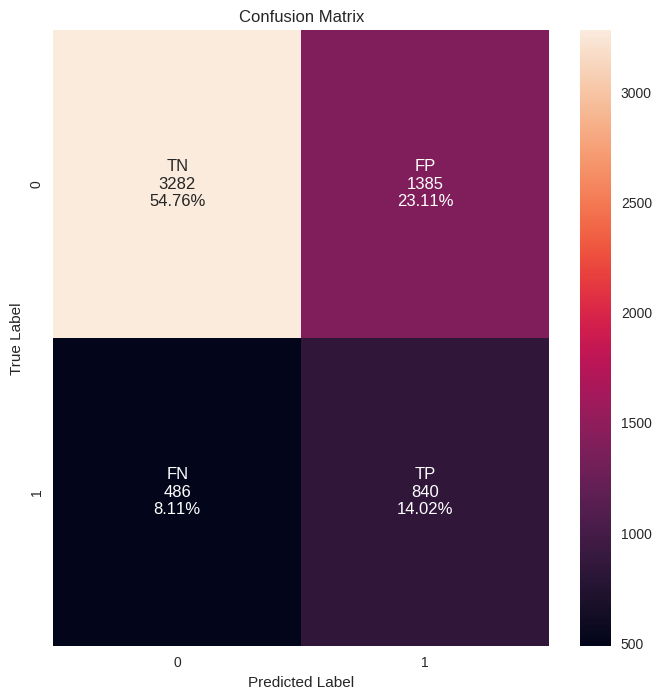

In [ ]:
# Train and evaluate Logistic Regression
preds, proba = model_training(LogisticRegression(random_state=42, class_weight='balanced'), X_train, y_train)
scores, conf_matrix = evaluate(preds, proba, metrics, y_test)
plot_evaluation(scores, conf_matrix)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.94      0.89      4667
           1       0.63      0.34      0.44      1326

    accuracy                           0.81      5993
   macro avg       0.73      0.64      0.66      5993
weighted avg       0.79      0.81      0.79      5993


=== Evaluation Metrics ===
Accuracy: 0.809277490405473
Precision: 0.6294200848656294
Recall: 0.33559577677224733
F1 Score: 0.4377766847024102
ROC-AUC Score: 0.7496845732738547


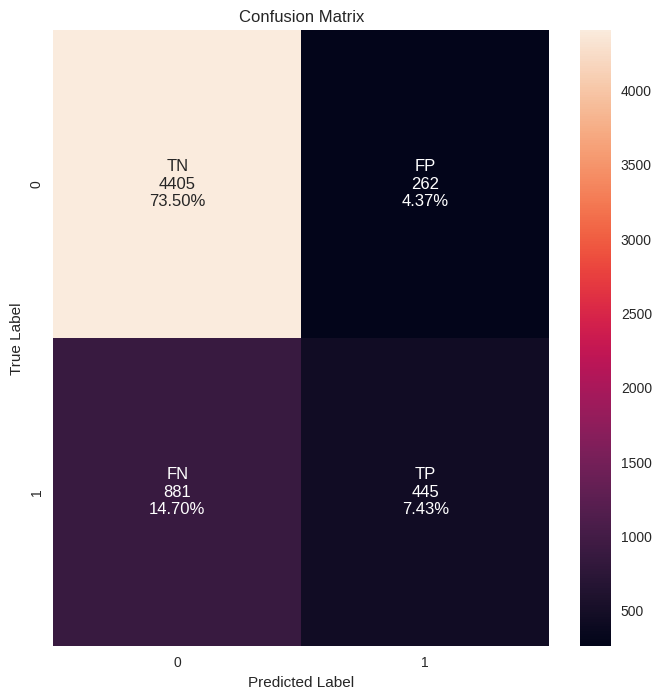

In [ ]:
# Train and evaluate Random Forest
preds, proba = model_training(RandomForestClassifier(random_state=42, class_weight='balanced'), X_train, y_train)
scores, conf_matrix = evaluate(preds, proba, metrics, y_test)
plot_evaluation(scores, conf_matrix)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4667
           1       0.46      0.61      0.53      1326

    accuracy                           0.76      5993
   macro avg       0.67      0.71      0.68      5993
weighted avg       0.79      0.76      0.77      5993


=== Evaluation Metrics ===
Accuracy: 0.7580510595694977
Precision: 0.4646522234891676
Recall: 0.6146304675716441
F1 Score: 0.5292207792207793
ROC-AUC Score: 0.7673440261700764


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


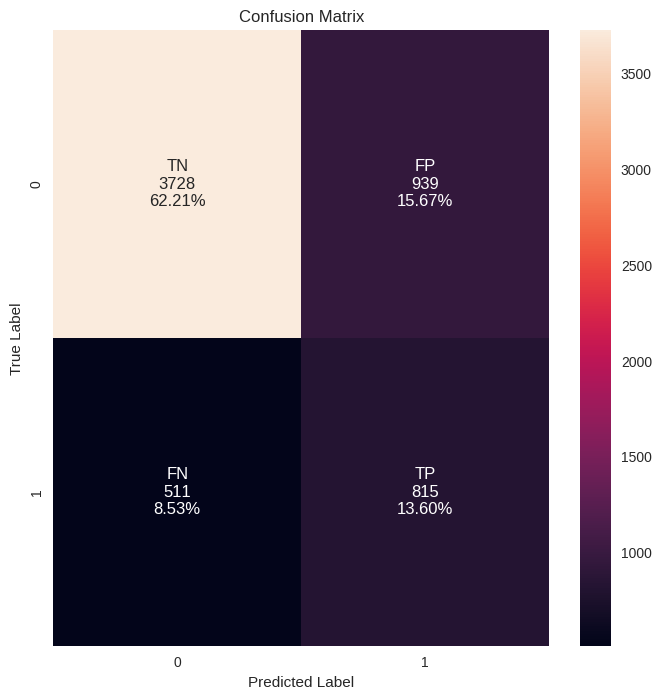

In [ ]:
# Train and evaluate LightGBM
preds, proba = model_training(LGBMClassifier(random_state=42, class_weight='balanced'), X_train, y_train)
scores, conf_matrix = evaluate(preds, proba, metrics, y_test)
plot_evaluation(scores, conf_matrix)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4667
           1       0.46      0.58      0.51      1326

    accuracy                           0.76      5993
   macro avg       0.66      0.69      0.67      5993
weighted avg       0.78      0.76      0.77      5993


=== Evaluation Metrics ===
Accuracy: 0.7560487235107626
Precision: 0.45913461538461536
Recall: 0.5761689291101055
F1 Score: 0.5110367892976588
ROC-AUC Score: 0.7461647051067134


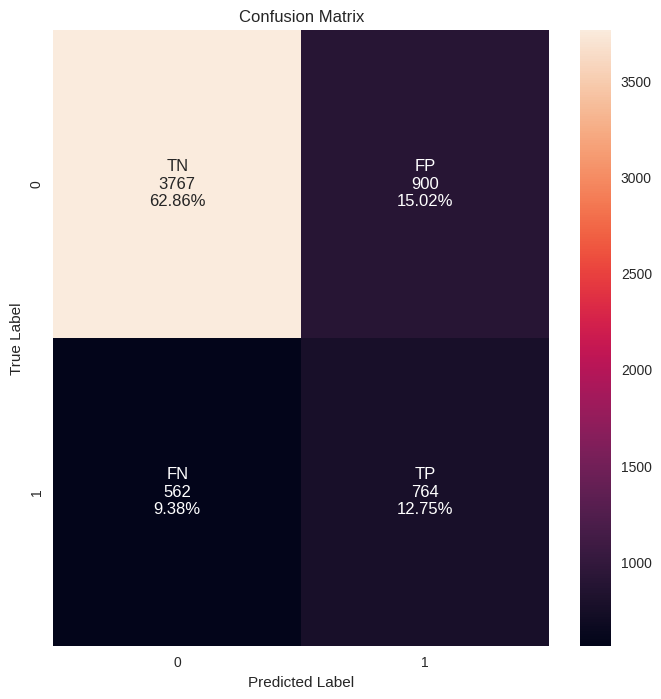

In [ ]:
# Train and evaluate XGBoost
preds, proba = model_training(XGBClassifier(random_state=42, scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train)), X_train, y_train)
scores, conf_matrix = evaluate(preds, proba, metrics, y_test)
plot_evaluation(scores, conf_matrix)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4667
           1       0.47      0.60      0.53      1326

    accuracy                           0.76      5993
   macro avg       0.67      0.70      0.69      5993
weighted avg       0.79      0.76      0.77      5993


=== Evaluation Metrics ===
Accuracy: 0.7638912064074754
Precision: 0.4734328358208955
Recall: 0.5980392156862745
F1 Score: 0.5284905031656114
ROC-AUC Score: 0.7622193114195785


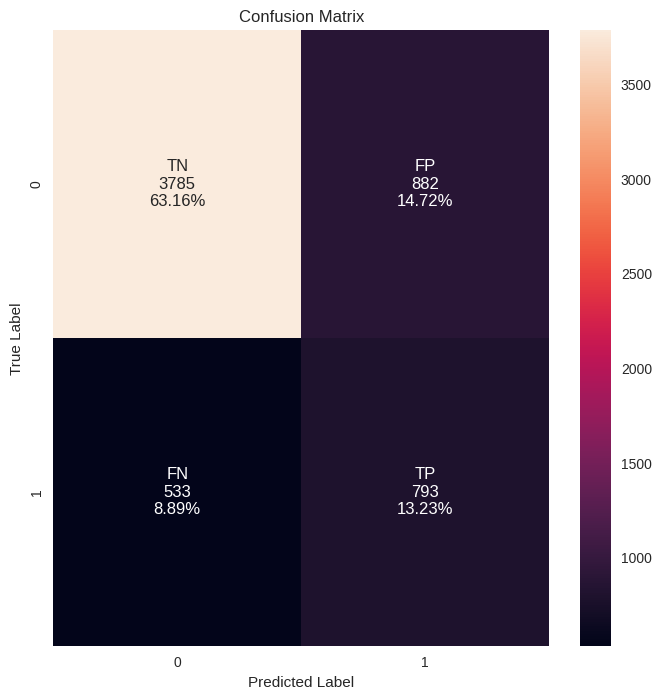

In [ ]:
# Train and evaluate CatBoost
preds, proba = model_training(CatBoostClassifier(random_state=42, auto_class_weights='Balanced', verbose=0), X_train, y_train)
scores, conf_matrix = evaluate(preds, proba, metrics, y_test)
plot_evaluation(scores, conf_matrix)

*Most machine learning models and evaluation metrics in popular libraries like scikit-learn automatically assume that the higher numeric label (e.g., 1 in a binary classification problem with labels 0 and 1) is the positive class by default.*

---


Ranking of Models (Imbalanced Dataset):

**LightGBM**: Best balance of precision, recall, and F1-score; efficient and scalable. Aligns with both F1-score from manual metrics and AutoML’s selection. Best for balanced performance.

**CatBoost**: good F1-score. Handles categorical data natively (not relevant here but advantageous generally). Robust to overfitting.

**Logistic Regression**: Simpler model with reasonable recall (0.63) and interpretability. A good baseline to compare more complex models.

###Fine tuning hyperparameters of chosen models

Based on AutoML Best Hyperparameters let's continue fine tuning to see the best results for LGBM and CatBoost Classifiers.

LGBM:
{'n_estimators': 5, 'num_leaves': 6, 'min_child_samples': 16, 'learning_rate': 1.0, 'log_max_bin': 10, 'colsample_bytree': 0.9364631270378546, 'reg_alpha': 0.039200761358427656, 'reg_lambda': 11.618528403273652}

CatBoost:
{'early_stopping_rounds': 13, 'learning_rate': 0.025858503359419936, 'n_estimators': 8192}

####LGBM

In [ ]:
# Model
model = LGBMClassifier(class_weight='balanced')

# Parameter Grid
param_grid = {
    'n_estimators': [20, 30],
    'num_leaves': [6, 8, 10],
    'min_child_samples': [10, 12, 15],
    'learning_rate': [0.2, 0.4, 0.6],
    'max_bin': [8, 10, 12],
    'colsample_bytree': [0.8, 0.936],  # Explore robust feature subsampling,  Increasing to 1 means using all features per tree, which might overfit
    'reg_alpha': [0.02, 0.06, 0.1],  # L1 regularization
    'reg_lambda': [11, 12, 13],  # L2 regularization
    'random_state': [42],  # Keep reproducible
}

# Folds
folds = KFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV
GS = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1', #recall roc_auc
    cv=folds,
    return_train_score=True,
    verbose=3,
    n_jobs=-1,  # Use all CPUs
    refit=True
)

# Fit model
GS.fit(X_train, y_train)
preds = GS.predict(X_test)
preds_proba = GS.predict_proba(X_test)[:, 1]

# Best Model and Parameters
best_model = GS.best_estimator_
best_params = GS.best_params_
print(f"Best Parameters: {best_params}")


Fitting 10 folds for each of 2916 candidates, totalling 29160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5304, number of negative: 18668
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 23972, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.4, 'max_bin': 10, 'min_child_samples': 12, 'n_estimators': 30, 'num_leaves': 8, 'random_state': 42, 'reg_alpha': 0.06, 'reg_lambda': 12}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The L

Best Parameters, trained on base dataset: {'colsample_bytree': 0.8, 'learning_rate': 0.4, 'max_bin': 10, 'min_child_samples': 12, 'n_estimators': 30, 'num_leaves': 8, 'random_state': 42, 'reg_alpha': 0.06, 'reg_lambda': 12}

In [ ]:
# Save model
filename = 'best_LGBM.sav'
pickle.dump(best_model, open(filename, 'wb'))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      4667
           1       0.45      0.64      0.53      1326

    accuracy                           0.75      5993
   macro avg       0.67      0.71      0.68      5993
weighted avg       0.79      0.75      0.76      5993


=== Evaluation Metrics ===
Accuracy: 0.7470382112464542
Precision: 0.4493603411513859
Recall: 0.6357466063348416
F1 Score: 0.5265459088069956
ROC-AUC Score: 0.7692766612339583


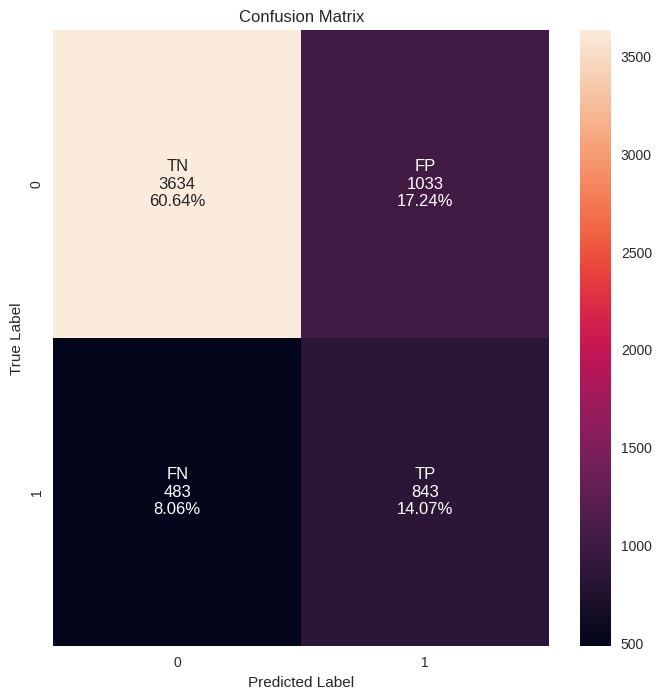

In [ ]:
# Load model & evaluate
filename = 'best_LGBM.sav'
best_LGBM = pickle.load(open(filename, 'rb'))
preds_LGBM = best_LGBM.predict(X_test)
preds_proba_LGBM = best_LGBM.predict_proba(X_test)[:, 1]
scores_LGBM, conf_matrix_LGBM = evaluate(preds_LGBM, preds_proba_LGBM, metrics, y_test)
plot_evaluation(scores_LGBM, conf_matrix_LGBM)

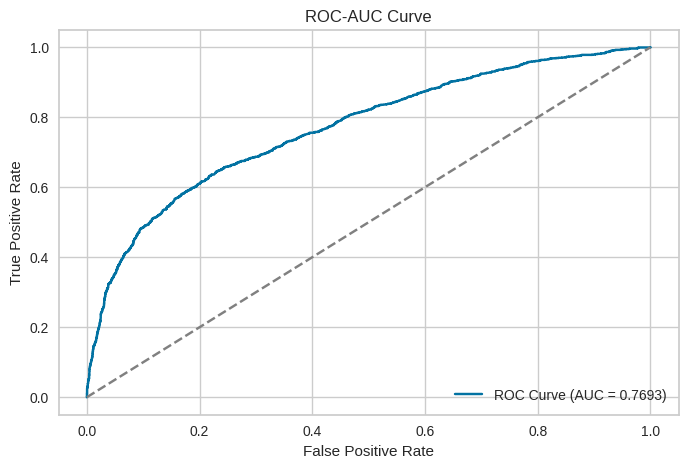

In [ ]:
# ROC Curve plot
def plot_roc_curve(y_test, preds_proba):
    fpr, tpr, thresholds = roc_curve(y_test, preds_proba)
    roc_auc = roc_auc_score(y_test, preds_proba)

    plt.figure(figsize=[8, 5])
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], ls="--", color='gray')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(y_test, preds_proba_LGBM)


####CatBoost

In [ ]:
# Model
model = CatBoostClassifier(auto_class_weights='Balanced', early_stopping_rounds=200)

# Parameter Grid
param_grid = {
    'iterations': [300],
    'depth': [5, 7],
    'learning_rate': [0.05, 0.07],
    'l2_leaf_reg': [2, 3, 4],
    'random_strength': [1.5, 2],
    'bagging_temperature': [0.5, 0.7],
    'random_seed': [42],  # Fixed for reproducibility
}


# Folds
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
GS = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',  # Can use recall, roc_auc depending on goal
    cv=folds,
    return_train_score=True,
    verbose=3,
    n_jobs=-1,  # Use all CPUs
    refit=True
)

# Fit model
GS.fit(X_train, y_train)
preds = GS.predict(X_test)
preds_proba = GS.predict_proba(X_test)[:, 1]

# Best Model and Parameters
best_model = GS.best_estimator_
best_params = GS.best_params_
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0:	learn: 0.6802983	total: 63.9ms	remaining: 19.1s
1:	learn: 0.6681819	total: 78.2ms	remaining: 11.6s
2:	learn: 0.6581468	total: 91.9ms	remaining: 9.1s
3:	learn: 0.6494779	total: 105ms	remaining: 7.78s
4:	learn: 0.6413506	total: 119ms	remaining: 7.01s
5:	learn: 0.6337135	total: 136ms	remaining: 6.68s
6:	learn: 0.6269408	total: 151ms	remaining: 6.33s
7:	learn: 0.6208094	total: 165ms	remaining: 6.03s
8:	learn: 0.6152754	total: 179ms	remaining: 5.8s
9:	learn: 0.6106511	total: 193ms	remaining: 5.6s
10:	learn: 0.6063257	total: 207ms	remaining: 5.44s
11:	learn: 0.6021166	total: 221ms	remaining: 5.3s
12:	learn: 0.5980148	total: 236ms	remaining: 5.2s
13:	learn: 0.5940861	total: 250ms	remaining: 5.1s
14:	learn: 0.5906422	total: 264ms	remaining: 5.01s
15:	learn: 0.5878434	total: 281ms	remaining: 4.99s
16:	learn: 0.5851187	total: 294ms	remaining: 4.89s
17:	learn: 0.5828362	total: 307ms	remaining: 4.82s
18:	learn: 0.5807325	total: 321ms

Best parameters, trained on base dataset: {'bagging_temperature': 0.5, 'depth': 7, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.05, 'random_seed': 42, 'random_strength': 1.5}


In [ ]:
# Save model
filename = 'best_CatBoost.sav'
pickle.dump(best_model, open(filename, 'wb'))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4667
           1       0.47      0.60      0.53      1326

    accuracy                           0.76      5993
   macro avg       0.67      0.71      0.69      5993
weighted avg       0.79      0.76      0.77      5993


=== Evaluation Metrics ===
Accuracy: 0.762389454363424
Precision: 0.4712103407755582
Recall: 0.6048265460030166
F1 Score: 0.5297225891677675
ROC-AUC Score: 0.769638949512656


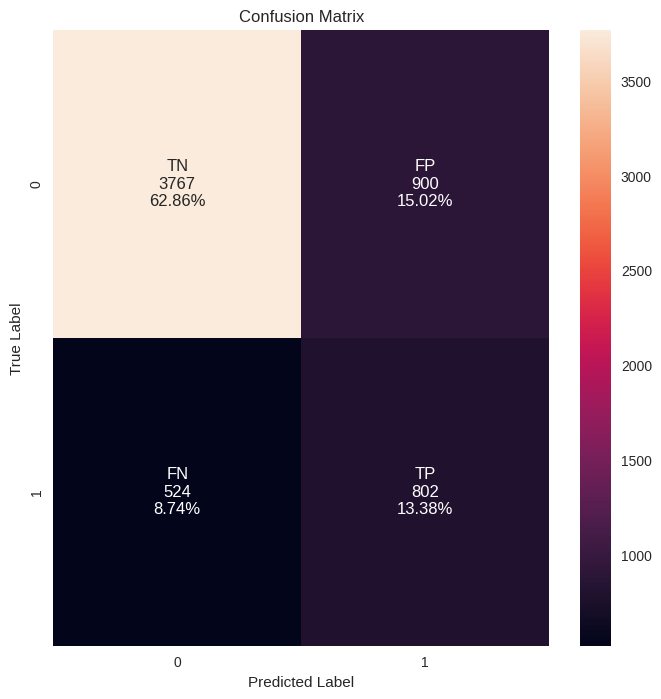

In [ ]:
# Load model & evaluate
filename = 'best_CatBoost.sav'
best_CatBoost = pickle.load(open(filename, 'rb'))
preds_CatBoost = best_CatBoost.predict(X_test)
preds_proba_CatBoost = best_CatBoost.predict_proba(X_test)[:, 1]
scores_CatBoost, conf_matrix_CatBoost = evaluate(preds_CatBoost, preds_proba_CatBoost, metrics, y_test)
plot_evaluation(scores_CatBoost, conf_matrix_CatBoost)

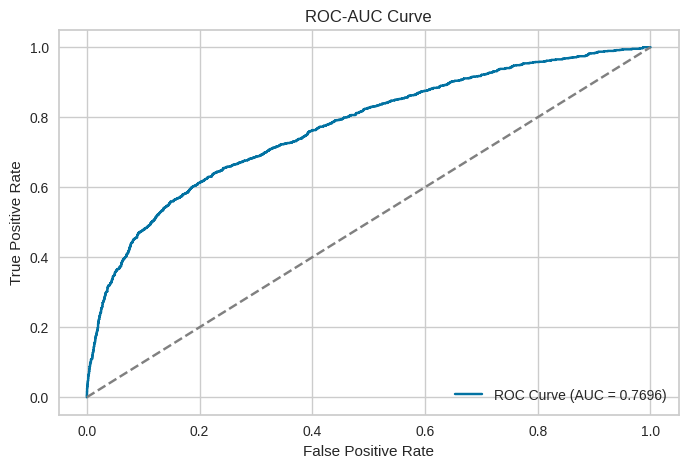

In [ ]:
# ROC Curve plot
def plot_roc_curve(y_test, preds_proba):
    fpr, tpr, thresholds = roc_curve(y_test, preds_proba)
    roc_auc = roc_auc_score(y_test, preds_proba)

    plt.figure(figsize=[8, 5])
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], ls="--", color='gray')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(y_test, preds_proba_CatBoost)


####Logistic Regression

In [ ]:
# Model
model = LogisticRegression(class_weight = 'balanced', verbose=1)

# Parameter Grid
param_grid = {
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 500, 1000],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength, smaller values indicate stronger regularization
    'random_state': [42],  # Reproducibility
}

# Folds
folds = KFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV
GS = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',  # Can use recall, roc_auc depending on goal
    cv=folds,
    return_train_score=True,
    verbose=3,
    n_jobs=-1,  # Use all CPUs
    refit=True
)

# Fit model
GS.fit(X_train, y_train)
preds = GS.predict(X_test)
preds_proba = GS.predict_proba(X_test)[:, 1]

# Best Model and Parameters
best_model = GS.best_estimator_
best_params = GS.best_params_
print(f"Best Parameters: {best_params}")

Fitting 10 folds for each of 30 candidates, totalling 300 fits
convergence after 125 epochs took 2 seconds
Best Parameters: {'C': 0.01, 'max_iter': 500, 'penalty': 'l2', 'random_state': 42, 'solver': 'saga'}


In [ ]:
# Save model
filename = 'best_logr.sav'
pickle.dump(best_model, open(filename, 'wb'))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      4667
           1       0.38      0.63      0.47      1326

    accuracy                           0.69      5993
   macro avg       0.62      0.67      0.63      5993
weighted avg       0.76      0.69      0.71      5993


=== Evaluation Metrics ===
Accuracy: 0.6886367428666778
Precision: 0.3782687105500451
Recall: 0.6327300150829562
F1 Score: 0.4734762979683973
ROC-AUC Score: 0.7164947170871118


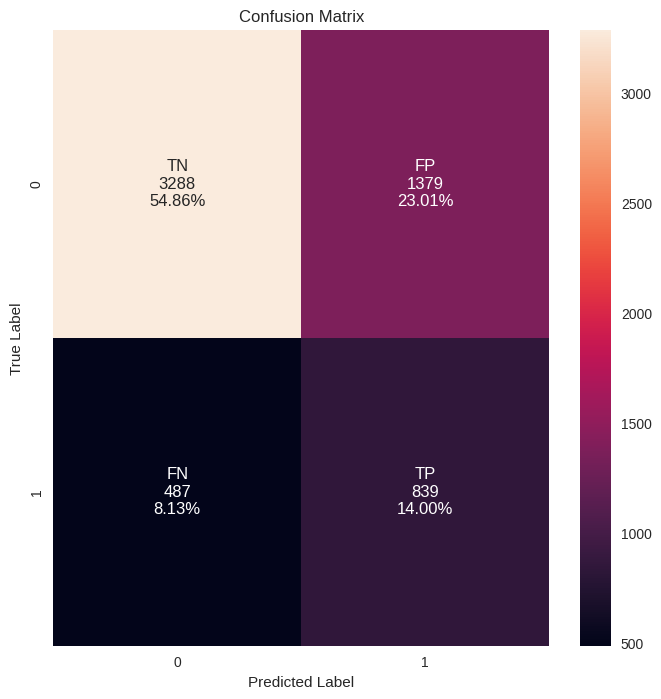

In [ ]:
# Load model & evaluate
filename = 'best_logr.sav'
best_logr = pickle.load(open(filename, 'rb'))
preds_logr = best_logr.predict(X_test)
preds_proba_logr = best_logr.predict_proba(X_test)[:, 1]
scores_logr, conf_matrix_logr = evaluate(preds_logr, preds_proba_logr, metrics, y_test)
plot_evaluation(scores_logr, conf_matrix_logr)

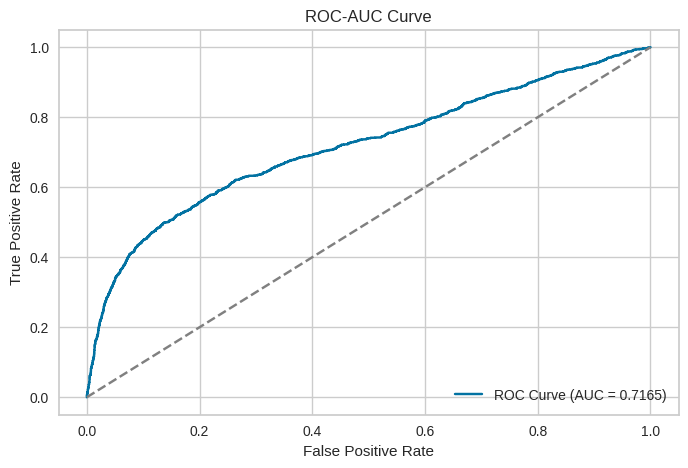

In [ ]:
# ROC Curve plot
def plot_roc_curve(y_test, preds_proba):
    fpr, tpr, thresholds = roc_curve(y_test, preds_proba)
    roc_auc = roc_auc_score(y_test, preds_proba)

    plt.figure(figsize=[8, 5])
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], ls="--", color='gray')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(y_test, preds_proba_logr)


####Summary

In this project 3 models were chosen, based on simple models performance and AutoML findings, both approaches gave similar results. Chosen models: LGBM, CatBoost and Logistic regression for comparison of models performance.

**Logistic Regression**

Lowest precission, which shows high rate of false possitive results. Simple classification model struggles to differenciate default and nondefault  cases. Recall almost as good as for the best model and low F1 score.

**CatBoost**

The best precision. The worst recall. We see the tradeoff between precison and recall. We see also the best F1 score obtained for this dataset.

**LGBM**

Precision second-best, lower than CatBoosts's for 2.2%. The best recall. This model shows the best capability of detecting minority class. F1 scores almost identical to Catboost, which shows the best compromise between precision and recall for this model.

---
 Hyperparameter tuning was explored for optimization but did not yield substantial improvements. Default settings of LGBM and CatBoost are optimized for general use cases and often provide good performance without extensive tuning.


#***7. SMOTE***

Avoid Data Leakage:

*Fitting scalers, PCA, or SMOTE on the entire dataset would leak information from the test set into the training process, compromising evaluation.*


---



In [10]:
# Data Load
file_path = 'https://raw.githubusercontent.com/Zanyata/Default-of-Credit-Card/refs/heads/main/data/df_prep.csv'
df_prep = load_data(file_path)
strat_train_set, strat_test_set, feature_names = stratify_splitting(df_prep)
X_train_smote, y_train_smote, X_test_nsmote, y_test_nsmote = xy_splitting_scaling(strat_train_set, strat_test_set)

In [11]:
# Print class distributions
print("Before SMOTE + Tomek Links (Training):")
print(np.asarray(np.unique(y_train_smote, return_counts=True)).T)

# Apply SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train_smote, y_train_smote)

# Print class distributions after SMOTE
print("\nAfter SMOTE + Tomek Links (Training):")
print(np.asarray(np.unique(y_train_smote, return_counts=True)).T)
# DO NOT apply SMOTETomek to the test set
print("\nTest set class distribution (untouched):")
print(np.asarray(np.unique(y_test_nsmote, return_counts=True)).T)

Before SMOTE + Tomek Links (Training):
[[    0 18668]
 [    1  5304]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTETomek or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.vali


After SMOTE + Tomek Links (Training):
[[    0 18200]
 [    1 18200]]

Test set class distribution (untouched):
[[   0 4667]
 [   1 1326]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 18200, number of negative: 18200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 36400, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      4667
           1       0.44      0.59      0.51      1326

    accuracy                           0.74      5993
   macro avg       0.66      0.69      0.67      5993
weighted avg       0.78      0.74      0.76      5993


=== Evaluation Metrics ===
Accuracy: 0.7430335391289838
Precision: 0.4400895856662934
Recall: 0.5927601809954751
F1 Score: 0.5051413881748072
ROC-AUC Score: 0.7501566630179293


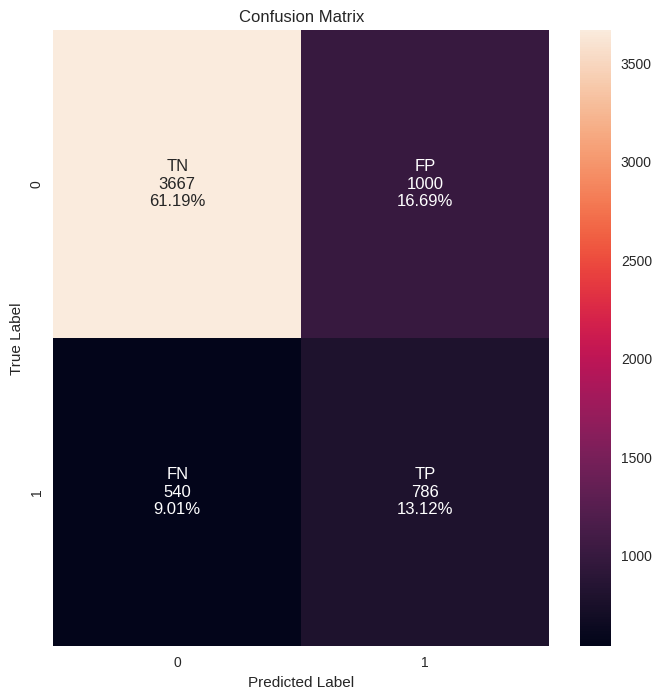

In [ ]:
# Fixed Hyperparameters from GridSearch best hyperparameters
model = LGBMClassifier(
    colsample_bytree=0.8,
    learning_rate=0.4,
    max_bin=10,
    min_child_samples=12,
    n_estimators=30,
    num_leaves=8,
    random_state=42,
    reg_alpha=0.06,
    reg_lambda=12,
    class_weight='balanced'
)

# Fit the model on SMOTE-balanced training data
model.fit(X_train_smote, y_train_smote)

# Predict outcomes and probabilities on the non-SMOTE test set
preds_LGBM = model.predict(X_test_nsmote)
preds_proba_LGBM = model.predict_proba(X_test_nsmote)[:, 1]

# Evaluate and plot results
scores_LGBM, conf_matrix_LGBM = evaluate(preds_LGBM, preds_proba_LGBM, metrics, y_test_nsmote)
plot_evaluation(scores_LGBM, conf_matrix_LGBM)

Insights:
SMOTE Performance:

SMOTE often helps in improving recall for imbalanced datasets but at the cost of precision. However, in this case, recall decreased, which suggests that SMOTE might not have added significant value or may have caused overfitting to the synthetic samples.
The decline in ROC-AUC and F1 further supports the idea that SMOTE wasn’t particularly helpful.

#***8. Additional Data Engineering & PCA***

In [6]:
# Data Load
file_path = 'https://raw.githubusercontent.com/Zanyata/Default-of-Credit-Card/refs/heads/main/data/df_prep.csv'
df_prep = load_data(file_path)
strat_train_set, strat_test_set, feature_names = stratify_splitting(df_prep)

<Axes: >

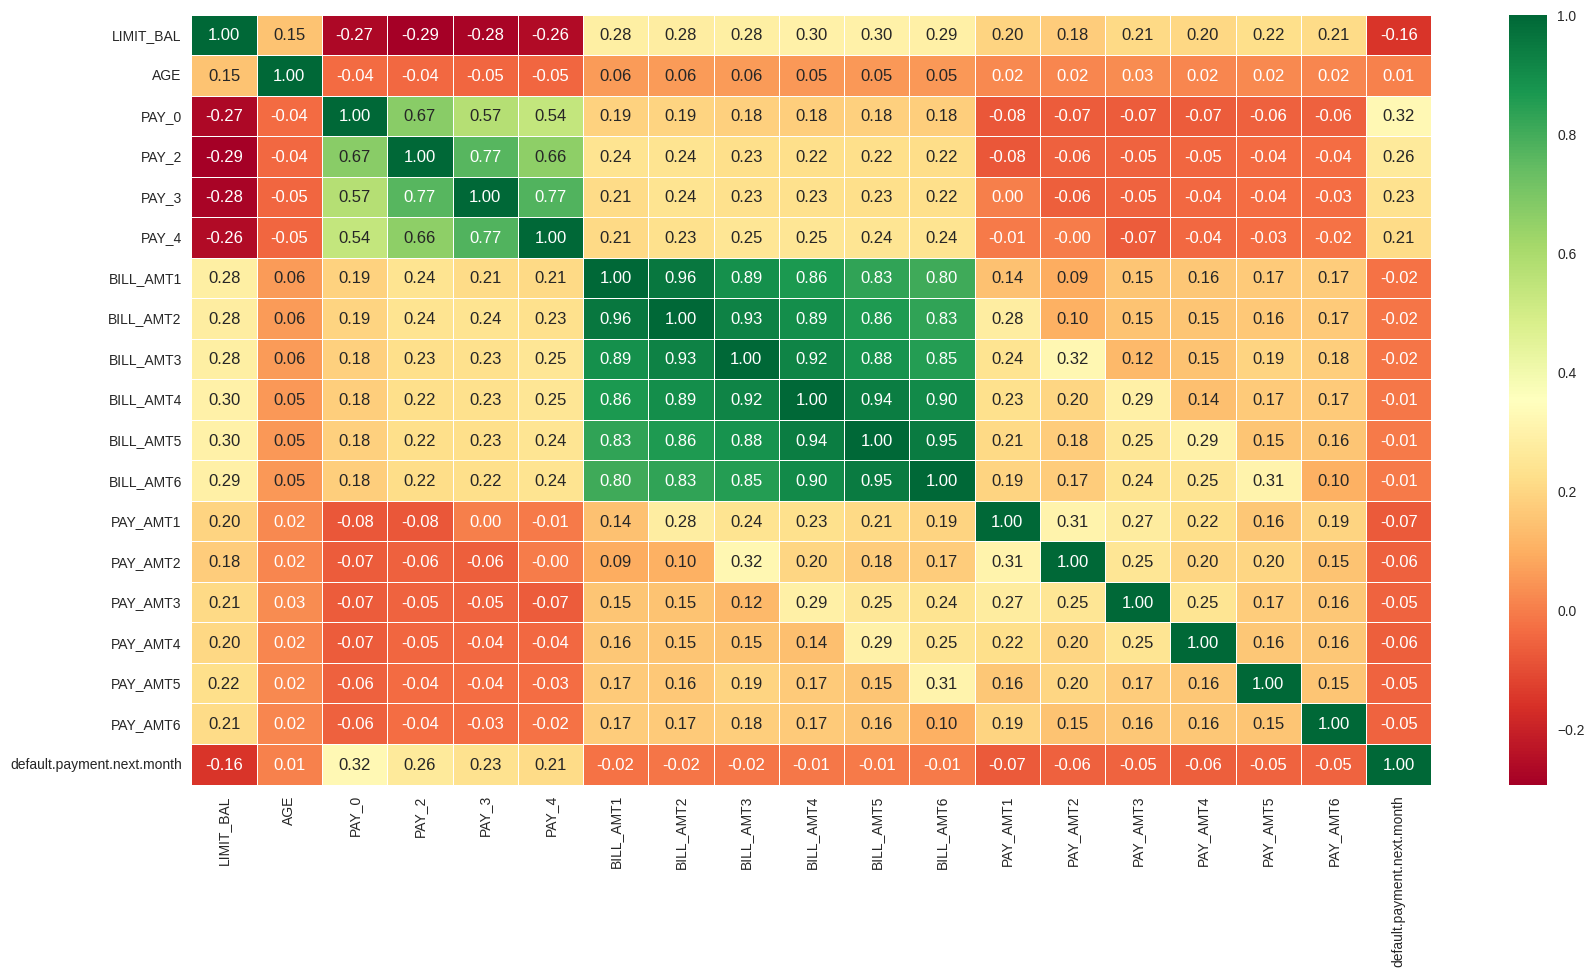

In [ ]:
# Correlation Heatmap
corrmat = strat_train_set.corr(numeric_only=True)
plt.figure(figsize=(20,10))
sns.heatmap(strat_train_set[corrmat.index].corr(),annot=True,linewidths=0.5,fmt='.2f',cmap="RdYlGn")

###Adding interaction LIMIT_BAL_PAY_0

In [7]:
# Investigating Combinations for Stronger Predictive Power
# Interaction Term
strat_train_set['LIMIT_BAL_PAY_0'] = strat_train_set['LIMIT_BAL'] * strat_train_set['PAY_0']
strat_test_set['LIMIT_BAL_PAY_0'] = strat_test_set['LIMIT_BAL'] * strat_test_set['PAY_0']

# Test the correlation of the interaction term with the target variable
interaction_corr = strat_train_set[['LIMIT_BAL_PAY_0', 'default.payment.next.month']].corr()
print("Correlation of Interaction Term with Default Payment:")
print(interaction_corr)


Correlation of Interaction Term with Default Payment:
                            LIMIT_BAL_PAY_0  default.payment.next.month
LIMIT_BAL_PAY_0                    1.000000                    0.209088
default.payment.next.month         0.209088                    1.000000


This interaction term can be included in the predictive model to enhance performance.

###Logarithic Transformation for skewed data

In [8]:
strat_train_set['log_LIMIT_BAL'] = np.log1p(strat_train_set['LIMIT_BAL'])
strat_test_set['log_LIMIT_BAL'] = np.log1p(strat_test_set['LIMIT_BAL'])

###PCA

In [9]:
# Addressing Multicollinearity in PAY_x, PAY_AMTx, and BILL_AMTx
# Function to calculate VIF for a DataFrame
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Select columns to test for multicollinearity
features_to_test = df_prep[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
                            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

# Calculate VIF
vif_result = calculate_vif(features_to_test)
print("Variance Inflation Factors:")
print(vif_result)


Variance Inflation Factors:
      feature        VIF
0       PAY_0   1.893206
1       PAY_2   3.134746
2       PAY_3   3.682480
3       PAY_4   2.752730
4    PAY_AMT1   1.889979
5    PAY_AMT2   2.379617
6    PAY_AMT3   1.899372
7    PAY_AMT4   1.776099
8    PAY_AMT5   1.820979
9    PAY_AMT6   1.251140
10  BILL_AMT1  20.521994
11  BILL_AMT2  38.178397
12  BILL_AMT3  31.752600
13  BILL_AMT4  29.456436
14  BILL_AMT5  35.803969
15  BILL_AMT6  21.319371


Analysis of Variance Inflation Factors (VIF)
VIF Insights:

BILL_AMTx variables show very high VIF values (above 10), indicating severe multicollinearity.

PAY_x, PAY_AMT_x variables have moderate VIF values, suggesting some multicollinearity but not as severe as BILL_AMTx.

In [10]:
# Define feature groups
PAY_x_BILL_x_PAY_AMTx = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
                         'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                         'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Standardize features in the training set
scaler = StandardScaler()
train_scaled = scaler.fit_transform(strat_train_set[PAY_x_BILL_x_PAY_AMTx])  # Fit and transform training set
test_scaled = scaler.transform(strat_test_set[PAY_x_BILL_x_PAY_AMTx])        # Transform test set using the same scaler

# Perform PCA on the entire feature set
pca = PCA(n_components=5, random_state=42)  # Adjust number of components as needed
train_pca = pca.fit_transform(train_scaled)  # Fit and transform training set
test_pca = pca.transform(test_scaled)        # Transform test set

# Add PCA components to the datasets
for i in range(train_pca.shape[1]):
    strat_train_set[f'PCA_PAY_x_BILL_x_PAY_AMTx{i+1}'] = train_pca[:, i]
    strat_test_set[f'PCA_PAY_x_BILL_x_PAY_AMTx{i+1}'] = test_pca[:, i]

# Print explained variance ratios
print(f"Explained Variance Ratios for Combined PCA: {pca.explained_variance_ratio_}")


Explained Variance Ratios for Combined PCA: [0.38062545 0.18166519 0.0924954  0.05635704 0.05517811]


In [11]:
#Replace Original Variables:
# Drop original PAY_x and BILL_AMTx columns with omitting PAY_0 since it showed highest correlation among theirs groups in feature importances
columns_for_removal = ['PAY_2', 'PAY_3', 'PAY_4',
                       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                       'LIMIT_BAL']
strat_train_set = strat_train_set.drop(columns=columns_for_removal)
strat_test_set = strat_test_set.drop(columns=columns_for_removal)


In [12]:
feature_names_pca = strat_train_set.drop(columns=["default.payment.next.month"]).columns
X_train_pca, y_train_pca, X_test_pca, y_test_pca = xy_splitting_scaling(strat_train_set, strat_test_set)

<Axes: >

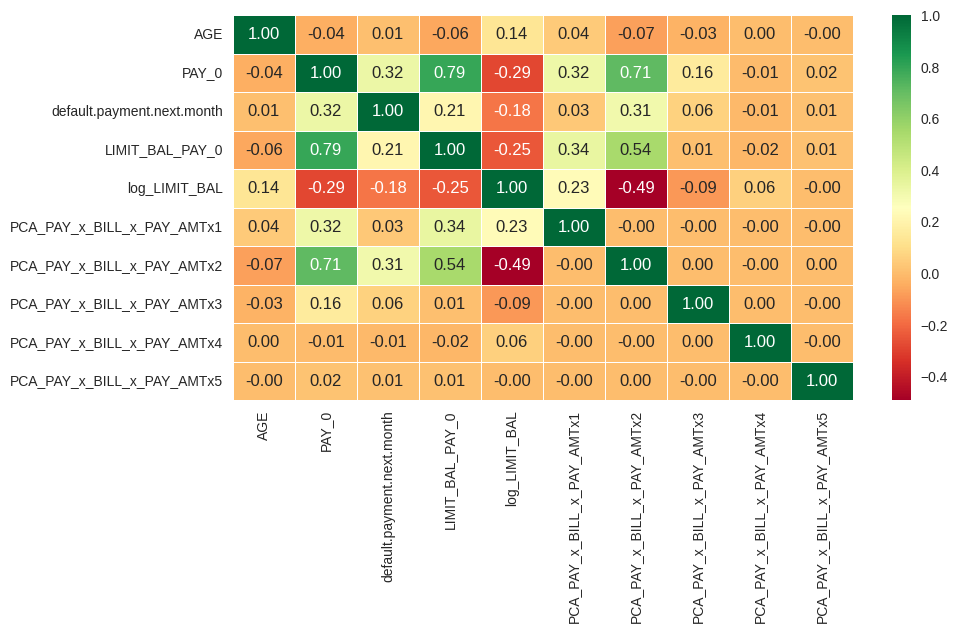

In [ ]:
# Correlation Heatmap after PCA
corrmat = strat_train_set.corr(numeric_only=True)
plt.figure(figsize=(10,5))
sns.heatmap(strat_train_set[corrmat.index].corr(),annot=True,linewidths=0.5,fmt='.2f',cmap="RdYlGn")

The correlation between log_LIMIT_BAL and the target (default.payment.next.month) is slightly lower than for LIMIT_BAL (-0.18 vs -0.16). This is not necessarily bad if the transformation helps improve model performance by handling outliers.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5304, number of negative: 18668
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 23972, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.80      0.83      4667
           1       0.46      0.61      0.52      1326

    accuracy                           0.75      5993
   macro avg       0.67      0.70      0.68      5993
weighted avg       0.78      0.75      0.77      5993


=== Evaluation Metrics ===
Accuracy: 0.7542132487902553
Precision: 0.45830969937606353
Re

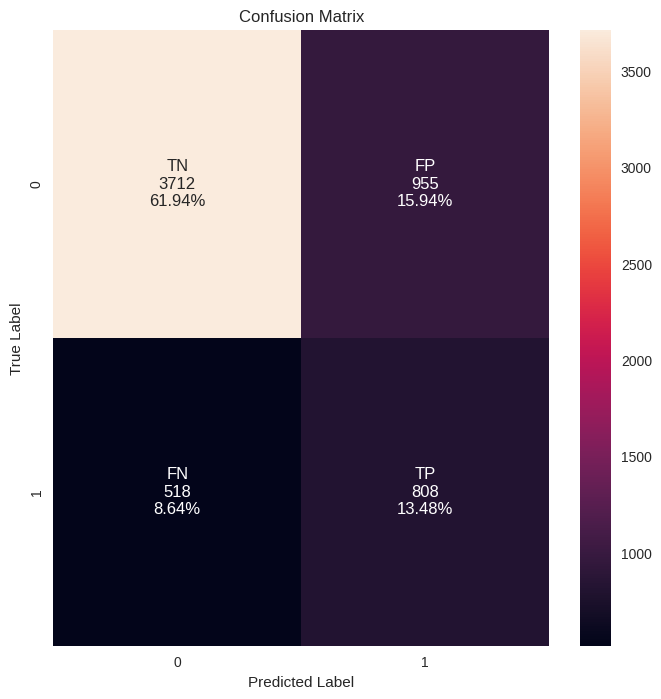

In [ ]:
# Fixed Hyperparameters from GridSearch best hyperparameters
model = LGBMClassifier(
    colsample_bytree=0.8,
    learning_rate=0.4,
    max_bin=10,
    min_child_samples=12,
    n_estimators=30,
    num_leaves=8,
    random_state=42,
    reg_alpha=0.06,
    reg_lambda=12,
    class_weight='balanced'
)

# Fit the model on PCA training data
model.fit(X_train_pca, y_train_pca)

# Predict outcomes and probabilities on the PCA test set
preds_LGBM = model.predict(X_test_pca)
preds_proba_LGBM = model.predict_proba(X_test_pca)[:, 1]

# Evaluate and plot results
scores_LGBM, conf_matrix_LGBM = evaluate(preds_LGBM, preds_proba_LGBM, metrics, y_test_pca)
plot_evaluation(scores_LGBM, conf_matrix_LGBM)

Given the small differences in metrics and the slight decrease in recall (important for detecting minority classes), focusing on the non-PCA approach without extensive data engineering is likely more effective. This approach preserves the interpretability of features and engage lower resources.


#***9. Conclusion***

---
* During this project there was performed Exploratory Data Analysis,  feature
importances, and dimensionality reduction. Some alternative routs of data alteration was also pursued, like SMOTE and PCA.

* The design of this project was to choose the best model which had the capacity of recognition such imbalanced  dataset. As a scoring method was used F1 score, which gives good compromise between precision and recall, which will minimize risk of overfitting. Precision, recall and F1 score were the most important metrics indicating model's overall performance. LGBM was chosen.

* Afterwards such model was tested, whether SMOTE, PCA or additional data engineering had any possitive impact on the evaluation metrics. In such case the chosen model would be trained again on altered data and such model would be used for predictions.

* Supprisingly SMOTE haven't helped, and in fact recall decreased. Also data engineering and PCA wasn't that helpful since model produced only slightly different outcome than base data, which shows that multicollinearity in given data wasn't that prevalent. Using PCA might be taken into consideration in large models/dataset cases, where such obtained dimensionality reduction would save a lot of computational power and time.

* Given all tests and taking into consideration lower computational demand, LGBM stays the best possible model for such dataset, it's efficient and scalable. Aligns with both F1-score from manual metrics and AutoML’s selection. Best for balanced performance. Possible further roads of improvement might contain: pocessing additional features of new samples, threshold adjustment (depending
on business case), models ensembling.

---